# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy import stats

from sklearn.feature_selection import SelectKBest, mutual_info_regression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
from IPython.display import HTML,display

# 1.0 Business Understanding

-- No code available for this section --

# 2.0 Data Understanding

## 2.1 Data Collection

-- No code available for this section --

## 2.2 Data Description

### 2.2.1 Data Loading

In [2]:
#Loading data
df = pd.read_csv('FINAL_USO.csv')
df

Date        Open        High         Low       Close   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0     21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1     18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2     12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3      9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4     11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   
...        ...         ...         ...         ...  ...        ...        ...   
1713   9736400  239.039993  240.839996  234.270004  ...  20.650000  21.090000   
1714  14293500  235.970001  246.179993  233.759995  ...  20.530001  20.620001   
1715  11874400  242.570007  248.289993  238.960007  ...  20.700001  20.969999   
1716   6864700  249.580002  251.399994  246.449997  ...  20.570000  20.600000   
1717   8449400  249.559998  250.190002  247.470001  ...  20.559999  21.090000   

      GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0         48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1         49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2         48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3         50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4         50.186852     8724300  37.669998  38.240002  37.520000  38.110001   
...             ...         ...        ...        ...        ...        ...   
1713      21.090000    60507000   9.490000   9.520000   9.280000   9.290000   
1714      20.620001    76365200   9.250000   9.920000   9.230000   9.900000   
1715      20.969999    52393000   9.590000   9.650000   9.370000   9.620000   
1716      20.600000    49835000   9.540000   9.650000   9.380000   9.530000   
1717      21.090000    53866600   9.630000   9.710000   9.440000   9.660000   

      USO_Adj Close  USO_Volume  
0         36.130001    12616700  
1         36.270000    12578800  
2         36.200001     7418200  
3         37.560001    10041600  
4         38.110001    10728000  
...             ...         ...  
1713       9.290000    21598200  
1714       9.900000    40978800  
1715       9.620000    36578700  
1716       9.530000    22803400  
1717       9.660000    28417400  

[1718 rows x 81 columns]

### 2.2.2 Basic Data Understanding

In [3]:
#Number of rows and columns 
df.shape

(1718, 81)

In [4]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

### 2.2.3 Descriptive Statistics

In [5]:
#Descriptive statistics
df.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  ...  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000  ...   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222  ...   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999  ...   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001  ...   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500  ...   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999  ...   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996  ...   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987  ...   

           GDX_Low    GDX_Close  GDX_Adj Close    GDX_Volume     USO_Open  \
count  1718.000000  1718.000000    1718.000000  1.718000e+03  1718.000000   
mean     26.384575    26.715012      25.924624  4.356515e+07    22.113417   
std      10.490908    10.603110       9.886570  2.909151e+07    11.431056   
min      12.400000    12.470000      12.269618  4.729000e+06     7.820000   
25%      20.355000    20.585000      20.180950  2.259968e+07    11.420000   
50%      22.870001    23.054999      22.677604  3.730465e+07    16.450000   
75%      26.797500    27.317500      26.478154  5.697055e+07    34.419998   
max      56.770000    57.470001      54.617039  2.321536e+08    41.599998   

          USO_High      USO_Low    USO_Close  USO_Adj Close    USO_Volume  
count  1718.000000  1718.000000  1718.000000    1718.000000  1.718000e+03  
mean     22.307148    21.904657    22.109051      22.109051  1.922313e+07  
std      11.478671    11.373997    11.432787      11.432787  1.575743e+07  
min       8.030000     7.670000     7.960000       7.960000  1.035100e+06  
25%      11.500000    11.300000    11.392500      11.392500  6.229500e+06  
50%      16.635001    16.040000    16.345000      16.345000  1.613015e+07  
75%      34.667499    34.110000    34.417499      34.417499  2.672375e+07  
max      42.299999    41.299999    42.009998      42.009998  1.102657e+08  

[8 rows x 80 columns]

## 2.3 Data Exploration

### 2.3.1 Relationship Exploration and Visualisation Using Heatmap and Bar Chart

#### 2.3.1.1 Relationship Visualisation

In [6]:
#Calculate the Pearson Coefficient Correlation, r of data columns
heatmap_columns = df.drop(['Date'],axis=1)
heatmap_columns.corr()

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
...                 ...       ...       ...       ...        ...       ...   
USO_High       0.634864  0.637208  0.633623  0.635311   0.635311  0.083064   
USO_Low        0.634277  0.636538  0.633140  0.634732   0.634732  0.080475   
USO_Close      0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Adj Close  0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Volume    -0.455920 -0.454913 -0.457628 -0.456193  -0.456193  0.069580   

                SP_open   SP_high    SP_low  SP_close  ...   GDX_Low  \
Open          -0.684314 -0.684597 -0.683464 -0.683998  ...  0.975479   
High          -0.688118 -0.688365 -0.687325 -0.687817  ...  0.975650   
Low           -0.680911 -0.681242 -0.679988 -0.680567  ...  0.975337   
Close         -0.684618 -0.684904 -0.683750 -0.684284  ...  0.975561   
Adj Close     -0.684618 -0.684904 -0.683750 -0.684284  ...  0.975561   
...                 ...       ...       ...       ...  ...       ...   
USO_High      -0.774626 -0.775482 -0.773550 -0.774799  ...  0.614587   
USO_Low       -0.771235 -0.772154 -0.770087 -0.771396  ...  0.613844   
USO_Close     -0.773099 -0.773957 -0.771928 -0.773159  ...  0.614733   
USO_Adj Close -0.773099 -0.773957 -0.771928 -0.773159  ...  0.614733   
USO_Volume     0.375568  0.377996  0.371390  0.374658  ... -0.429839   

               GDX_Close  GDX_Adj Close  GDX_Volume  USO_Open  USO_High  \
Open            0.974596       0.974098   -0.514230  0.634872  0.634864   
High            0.975341       0.974746   -0.508782  0.637101  0.637208   
Low             0.974568       0.974182   -0.519988  0.633591  0.633623   
Close           0.975459       0.974980   -0.514616  0.635197  0.635311   
Adj Close       0.975459       0.974980   -0.514616  0.635197  0.635311   
...                  ...            ...         ...       ...       ...   
USO_High        0.614766       0.600523   -0.522581  0.999857  1.000000   
USO_Low         0.613931       0.599819   -0.523956  0.999848  0.999818   
USO_Close       0.614915       0.600756   -0.523801  0.999699  0.999867   
USO_Adj Close   0.614915       0.600756   -0.523801  0.999699  0.999867   
USO_Volume     -0.426553      -0.421065    0.498816 -0.699000 -0.695678   

                USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Open           0.634277   0.635138       0.635138   -0.455920  
High           0.636538   0.637483       0.637483   -0.454913  
Low            0.633140   0.633994       0.633994   -0.457628  
Close          0.634732   0.635675       0.635675   -0.456193  
Adj Close      0.634732   0.635675       0.635675   -0.456193  
...                 ...        ...            ...         ...  
USO_High       0.999818   0.999867       0.999867   -0.695678  
USO_Low        1.000000   0.999879       0.999879   -0.702665  
USO_Close      0.999879   1.000000       1.000000   -0.699221  
USO_Adj Close  0.999879   1.000000       1.000000   -0.699221  
USO_Volume    -0.702665  -0.699221      -0.699221    1.000000  

[80 rows x 80 columns]

<Axes: >

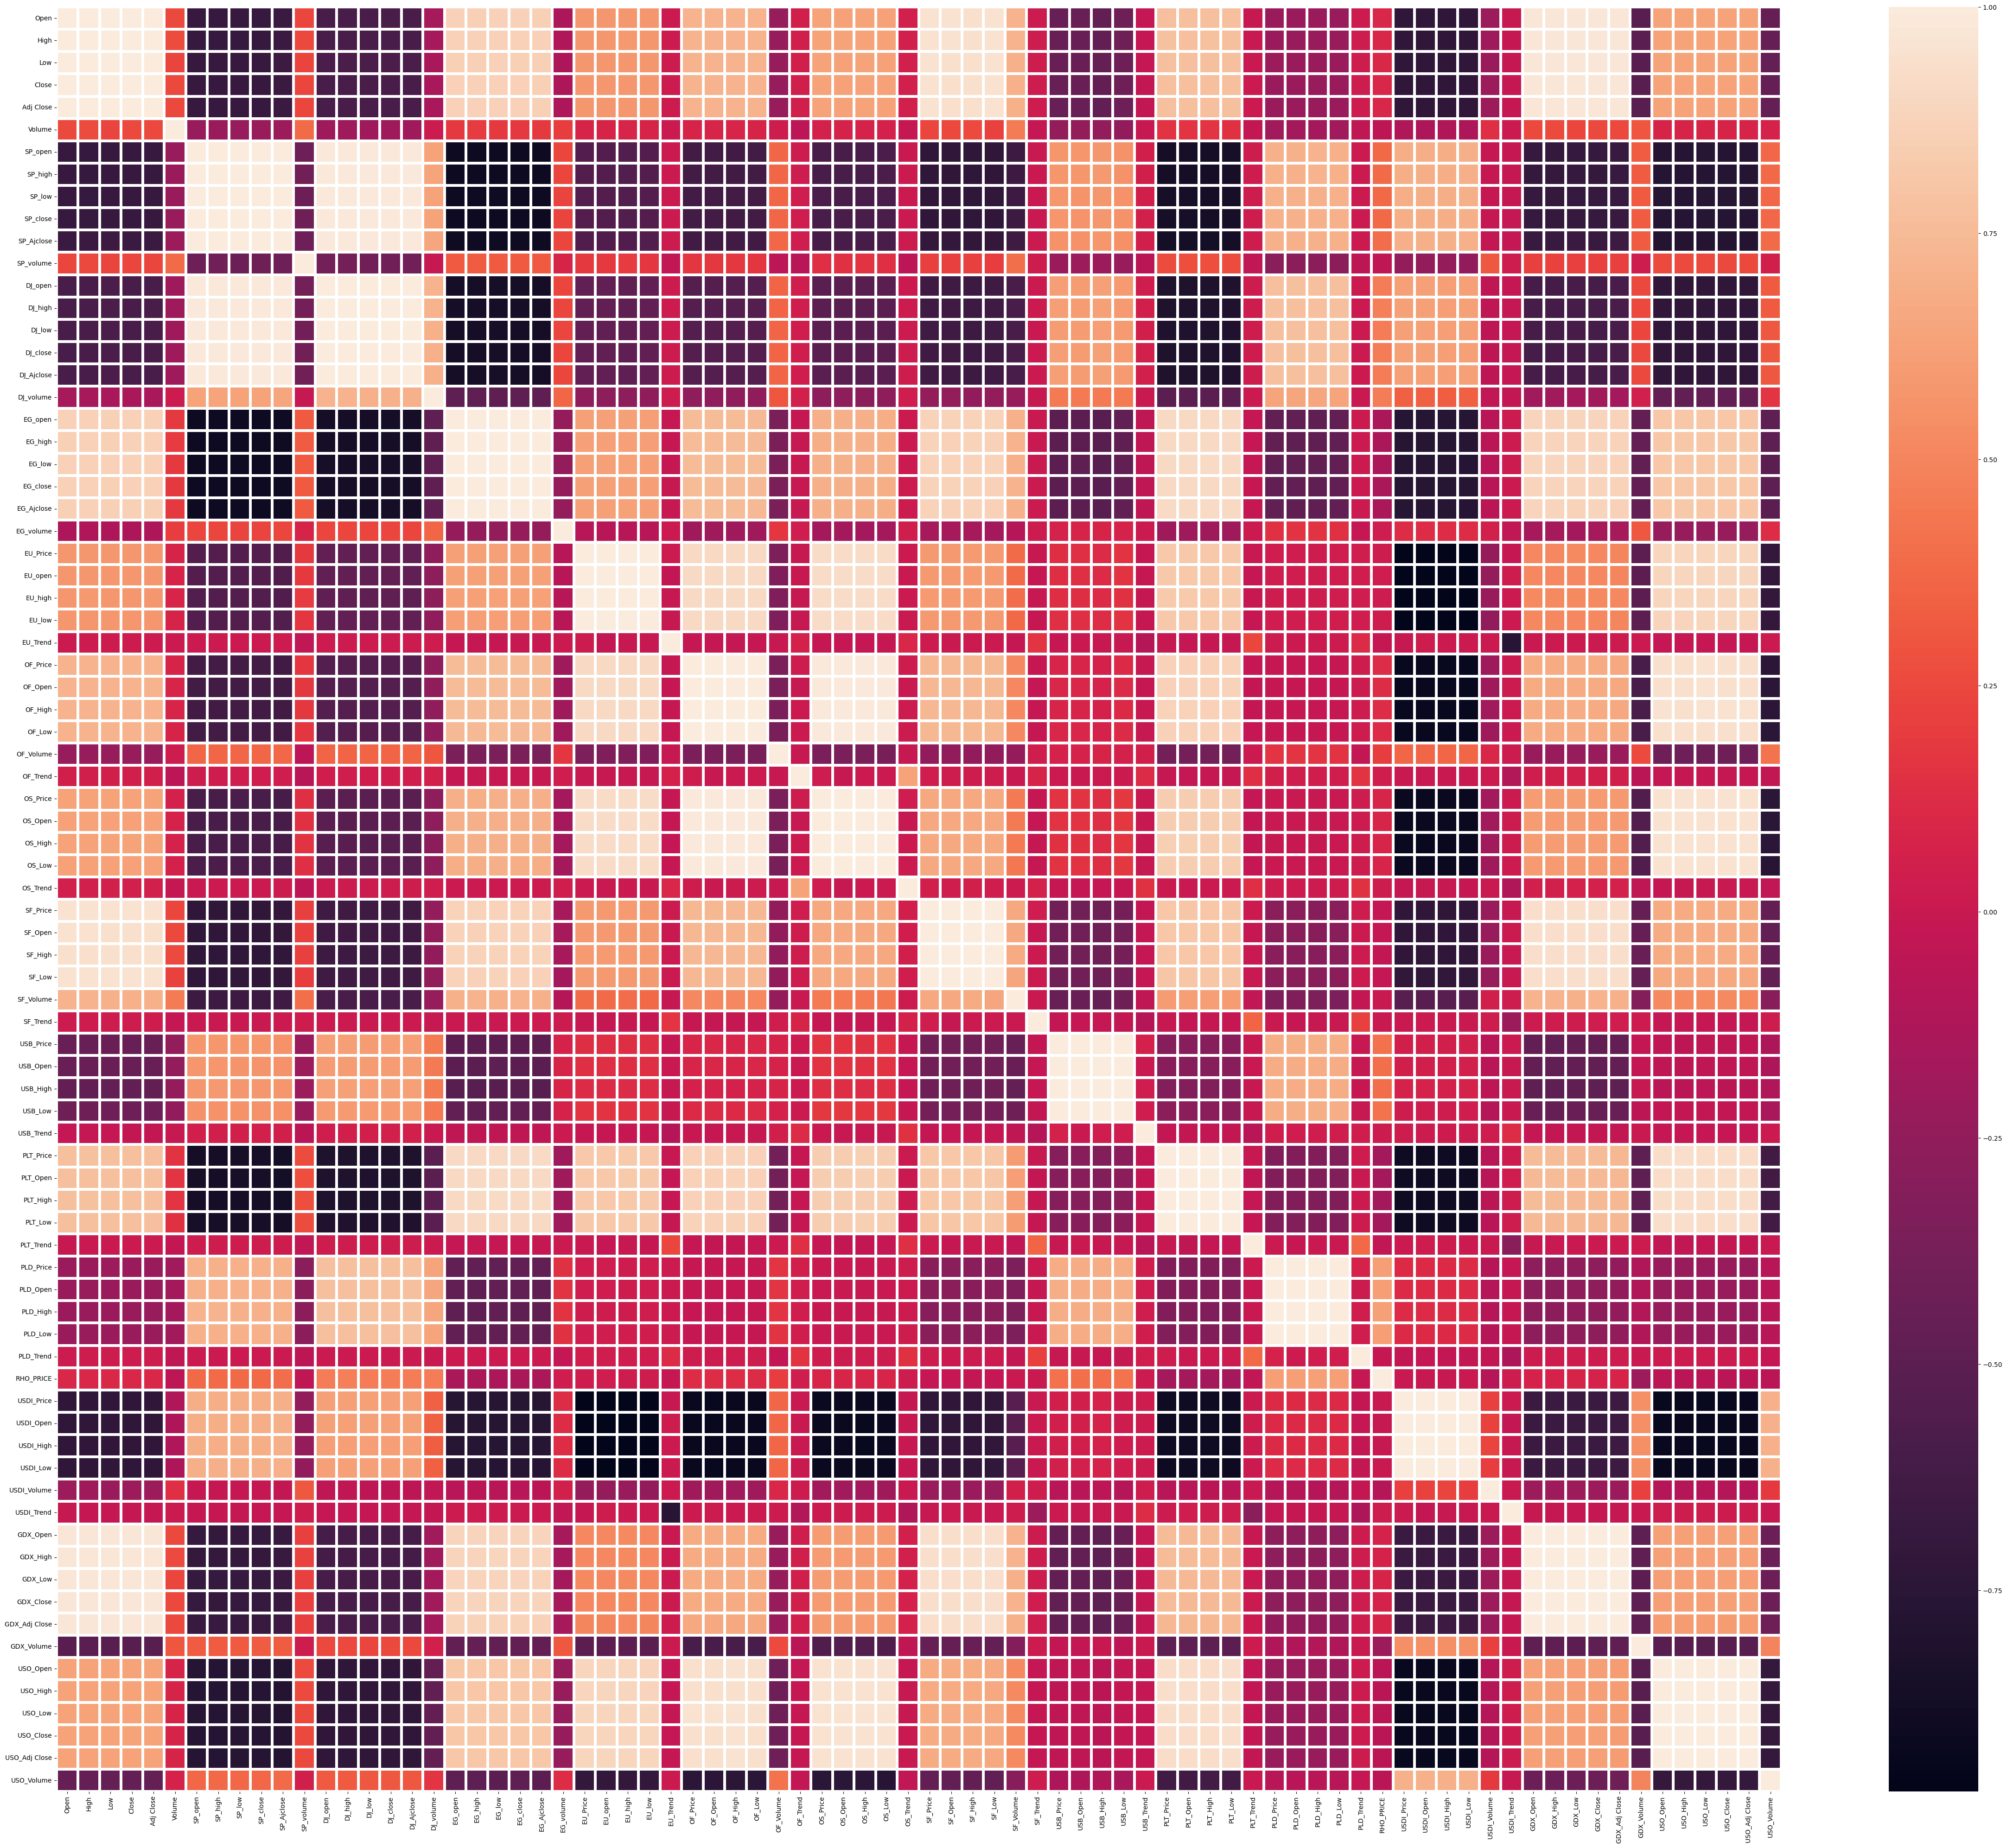

In [7]:
#Display heatmap
heatmap_plot = heatmap_columns.corr()
plt.figure(figsize=(60,50))
sns.heatmap(heatmap_plot, xticklabels = heatmap_plot.columns, yticklabels = heatmap_plot.columns, linewidths = 3.0)

<Axes: title={'center': "Correlation with Target Variable 'Adj Close'"}>

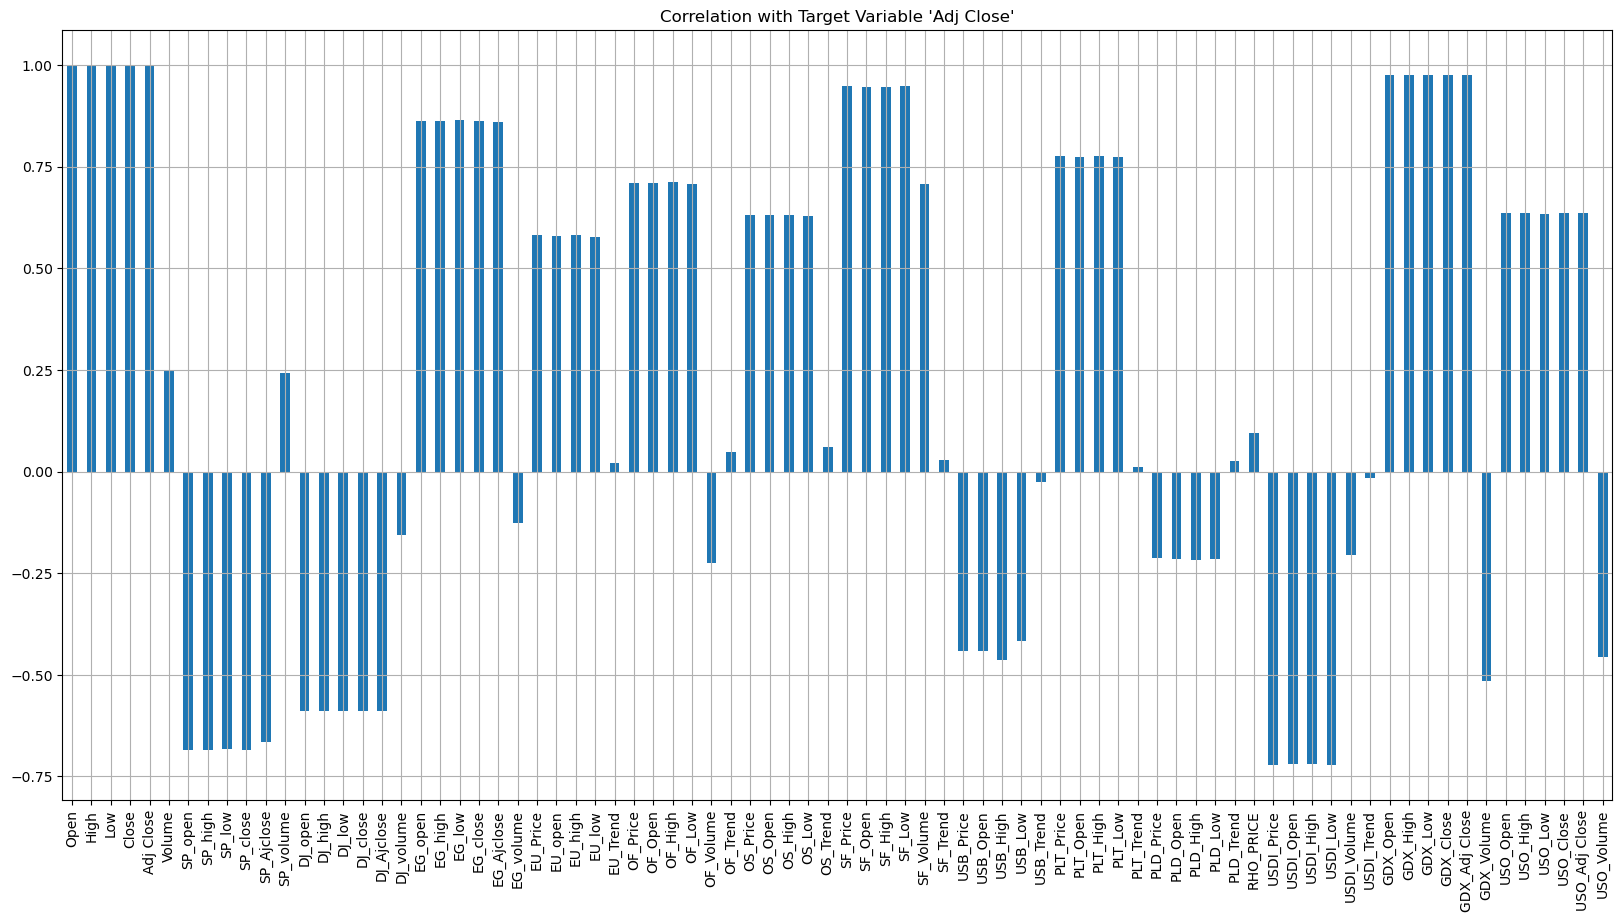

In [8]:
# bar chart - visualise correlation with the target variable
bar_columns = df.drop(['Date'],axis = 1)
bar_columns.corrwith(df['Adj Close']).plot.bar(figsize =(20,10) ,
                                               title = "Correlation with Target Variable 'Adj Close'",
                                               fontsize = 10,
                                               rot = 90, 
                                               grid = True)

#### 2.3.1.2 Relationship Exploration

In [9]:
#Figure out which relationships have r > 0.7
heatmap_plot[(heatmap_plot>=0.7 )| (heatmap_plot<=-0.7)]

Open      High       Low     Close  Adj Close  Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976     NaN   
High           0.999515  1.000000  0.999262  0.999535   0.999535     NaN   
Low            0.999442  0.999262  1.000000  0.999532   0.999532     NaN   
Close          0.998976  0.999535  0.999532  1.000000   1.000000     NaN   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000     NaN   
...                 ...       ...       ...       ...        ...     ...   
USO_High            NaN       NaN       NaN       NaN        NaN     NaN   
USO_Low             NaN       NaN       NaN       NaN        NaN     NaN   
USO_Close           NaN       NaN       NaN       NaN        NaN     NaN   
USO_Adj Close       NaN       NaN       NaN       NaN        NaN     NaN   
USO_Volume          NaN       NaN       NaN       NaN        NaN     NaN   

                SP_open   SP_high    SP_low  SP_close  ...   GDX_Low  \
Open                NaN       NaN       NaN       NaN  ...  0.975479   
High                NaN       NaN       NaN       NaN  ...  0.975650   
Low                 NaN       NaN       NaN       NaN  ...  0.975337   
Close               NaN       NaN       NaN       NaN  ...  0.975561   
Adj Close           NaN       NaN       NaN       NaN  ...  0.975561   
...                 ...       ...       ...       ...  ...       ...   
USO_High      -0.774626 -0.775482 -0.773550 -0.774799  ...       NaN   
USO_Low       -0.771235 -0.772154 -0.770087 -0.771396  ...       NaN   
USO_Close     -0.773099 -0.773957 -0.771928 -0.773159  ...       NaN   
USO_Adj Close -0.773099 -0.773957 -0.771928 -0.773159  ...       NaN   
USO_Volume          NaN       NaN       NaN       NaN  ...       NaN   

               GDX_Close  GDX_Adj Close  GDX_Volume  USO_Open  USO_High  \
Open            0.974596       0.974098         NaN       NaN       NaN   
High            0.975341       0.974746         NaN       NaN       NaN   
Low             0.974568       0.974182         NaN       NaN       NaN   
Close           0.975459       0.974980         NaN       NaN       NaN   
Adj Close       0.975459       0.974980         NaN       NaN       NaN   
...                  ...            ...         ...       ...       ...   
USO_High             NaN            NaN         NaN  0.999857  1.000000   
USO_Low              NaN            NaN         NaN  0.999848  0.999818   
USO_Close            NaN            NaN         NaN  0.999699  0.999867   
USO_Adj Close        NaN            NaN         NaN  0.999699  0.999867   
USO_Volume           NaN            NaN         NaN       NaN       NaN   

                USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Open                NaN        NaN            NaN         NaN  
High                NaN        NaN            NaN         NaN  
Low                 NaN        NaN            NaN         NaN  
Close               NaN        NaN            NaN         NaN  
Adj Close           NaN        NaN            NaN         NaN  
...                 ...        ...            ...         ...  
USO_High       0.999818   0.999867       0.999867         NaN  
USO_Low        1.000000   0.999879       0.999879   -0.702665  
USO_Close      0.999879   1.000000       1.000000         NaN  
USO_Adj Close  0.999879   1.000000       1.000000         NaN  
USO_Volume    -0.702665        NaN            NaN    1.000000  

[80 rows x 80 columns]

### 2.3.2 Trend and Pattern Exploration and Visualisation Using Line Chart

#### 2.3.2.1 Gold Related Variables exploration and Visualisation

##### Gold ETF (Exchange Traded Fund)

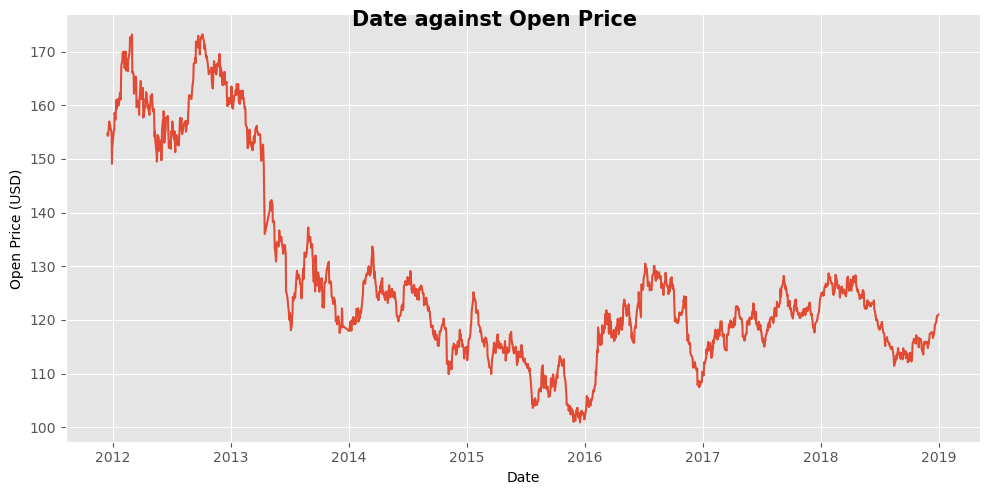

In [10]:
# 'Open' column line chart
plt.style.use('ggplot')
df['Date'] = pd.to_datetime(df['Date'])
sns.relplot(x='Date', y='Open', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'Open Price (USD)').fig.suptitle('Date against Open Price', fontsize=15, fontweight = 'bold');

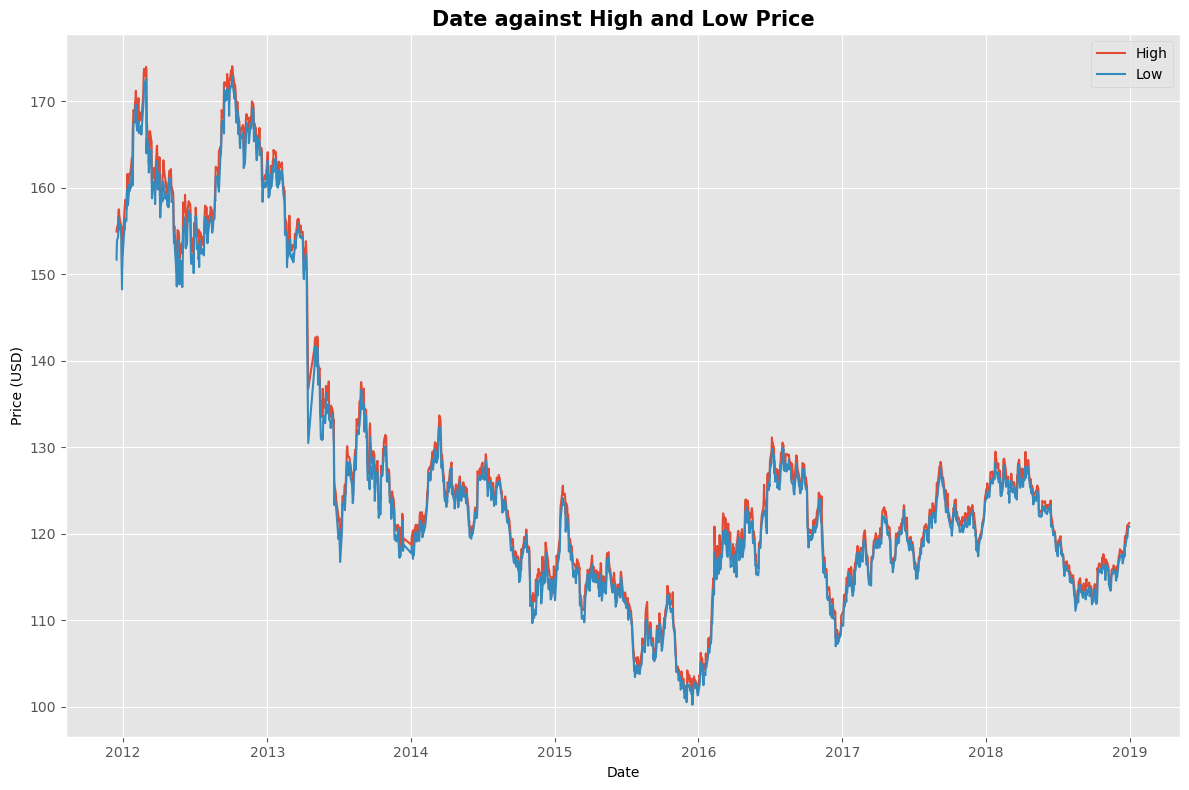

In [11]:
# 'High' and 'Low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='High', data=df, label='High')
sns.lineplot(x='Date', y='Low', data=df, label='Low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against High and Low Price', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

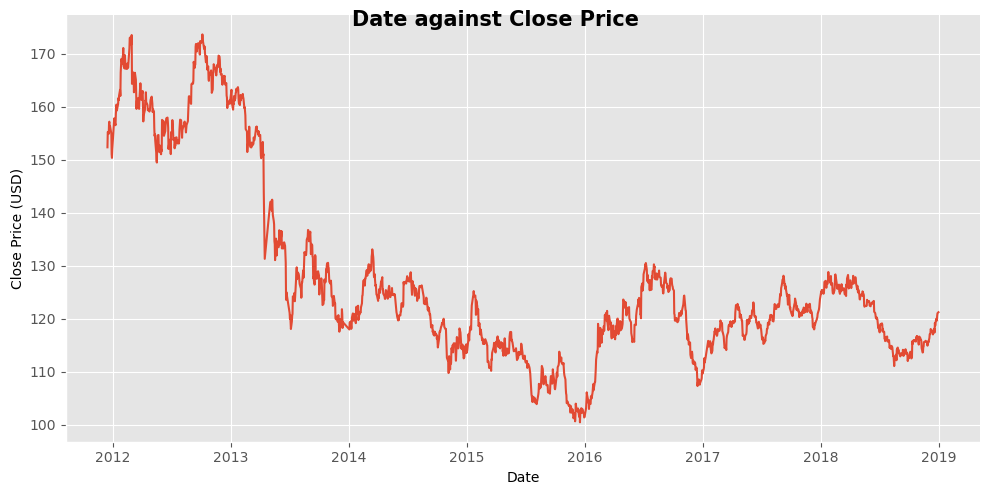

In [12]:
# 'Close' column line chart
sns.relplot(x='Date', y='Close', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'Close Price (USD)').fig.suptitle('Date against Close Price', fontsize=15, fontweight = 'bold');

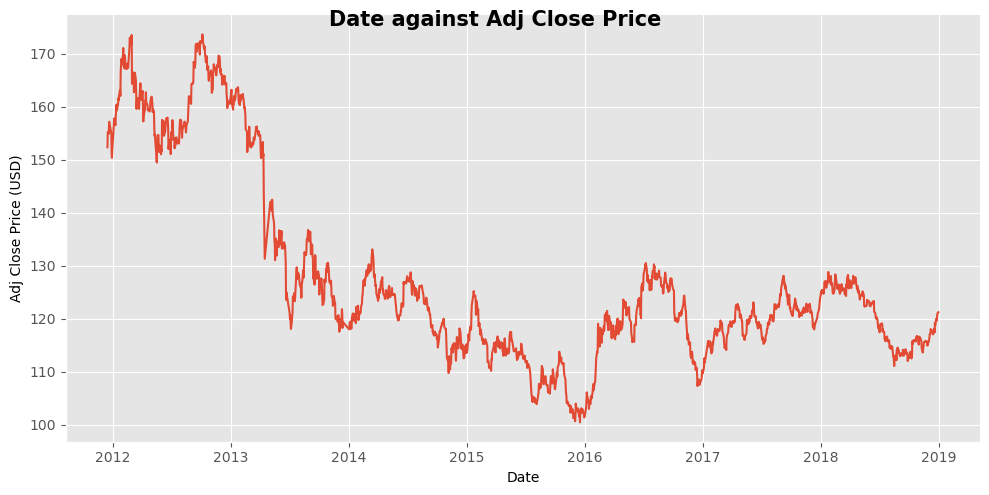

In [13]:
# 'Adj close' column line chart
sns.relplot(x='Date', y='Adj Close', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'Adj Close Price (USD)').fig.suptitle('Date against Adj Close Price', fontsize=15, fontweight = 'bold');

##### Eldorado Gold Corporation (EG)

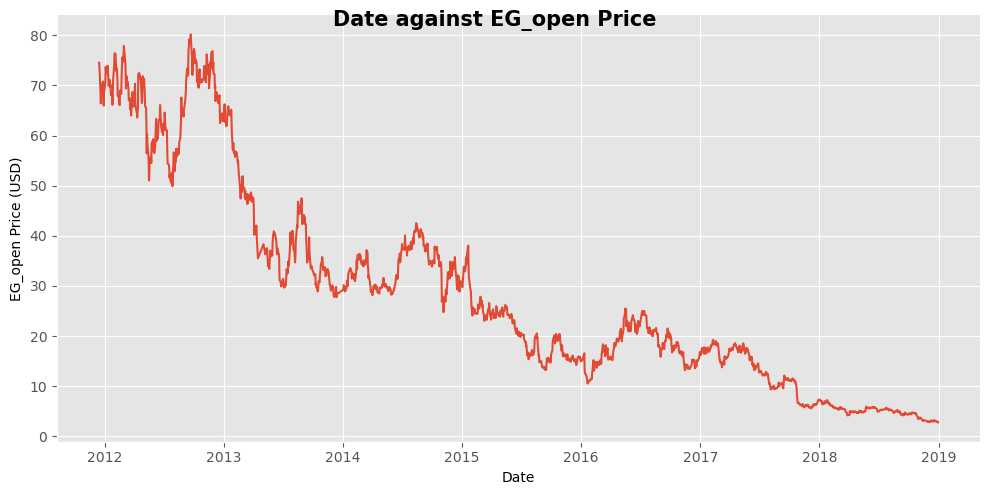

In [14]:
# 'EG_open' column line chart
sns.relplot(x='Date', y='EG_open', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'EG_open Price (USD)').fig.suptitle('Date against EG_open Price', fontsize=15, fontweight = 'bold');

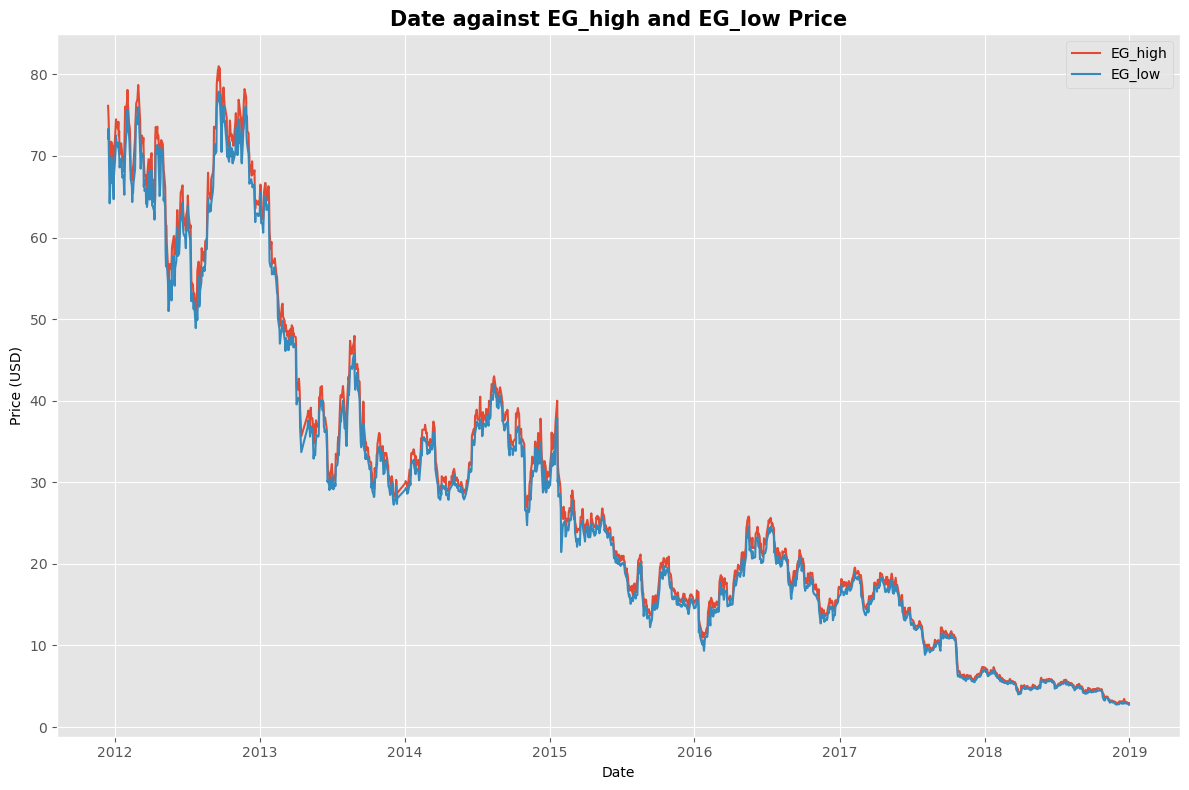

In [15]:
# 'EG_high' and 'EG_low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='EG_high', data=df, label='EG_high')
sns.lineplot(x='Date', y='EG_low', data=df, label='EG_low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against EG_high and EG_low Price', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

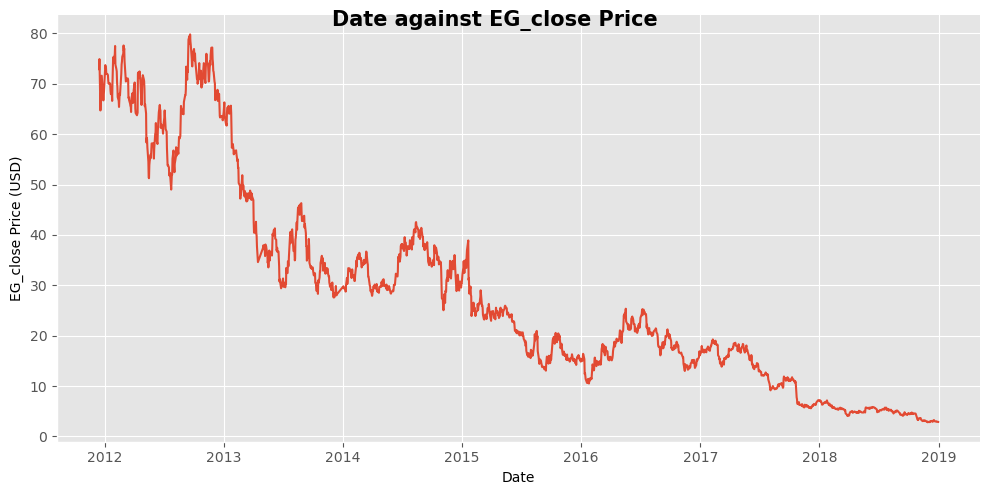

In [16]:
# 'EG_close' column line chart
sns.relplot(x='Date', y='EG_close', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'EG_close Price (USD)').fig.suptitle('Date against EG_close Price', fontsize=15, fontweight = 'bold');

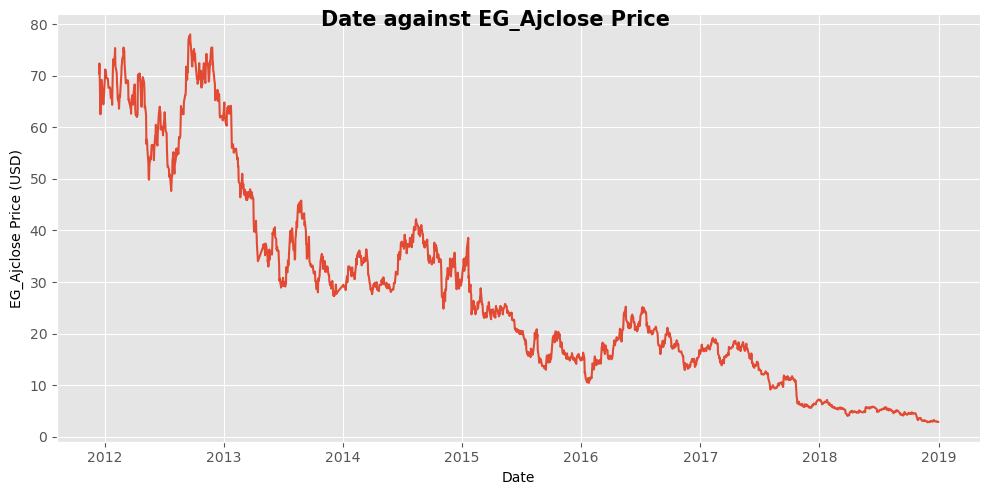

In [17]:
# 'EG_Ajclose' column line chart
sns.relplot(x='Date', y='EG_Ajclose', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'EG_Ajclose Price (USD)').fig.suptitle('Date against EG_Ajclose Price', fontsize=15, fontweight = 'bold');

##### Gold Miners ETF (GDX)

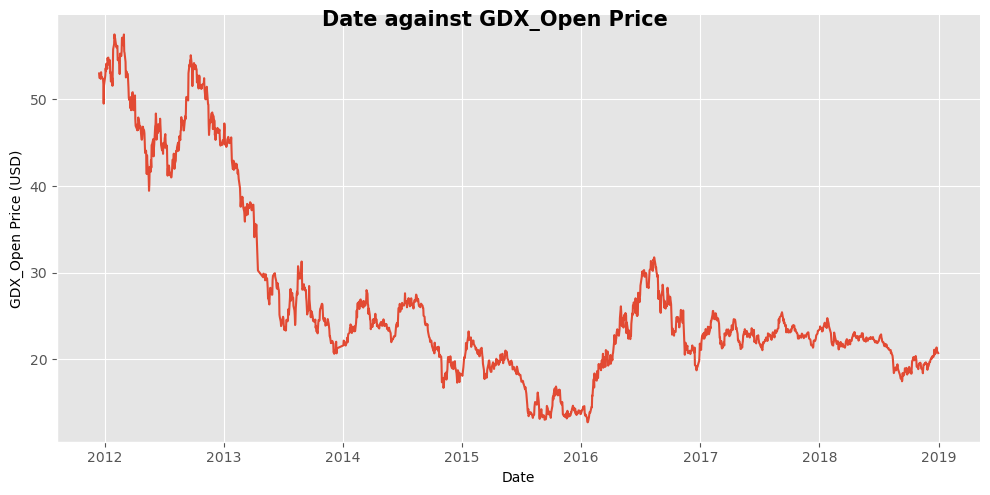

In [18]:
# 'GDX_Open'
sns.relplot(x='Date', y='GDX_Open', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'GDX_Open Price (USD)').fig.suptitle('Date against GDX_Open Price', fontsize=15, fontweight = 'bold');

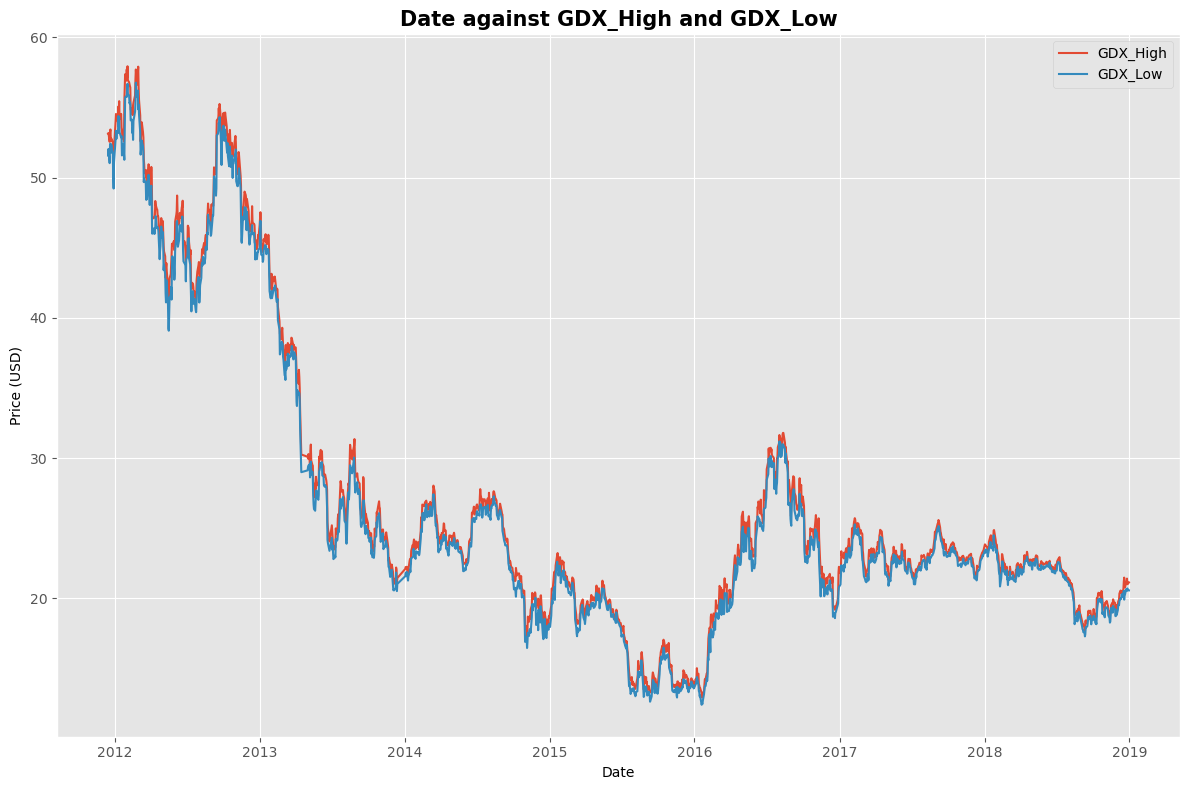

In [19]:
# 'GDX_High' and 'GDX_Low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='GDX_High', data=df, label='GDX_High')
sns.lineplot(x='Date', y='GDX_Low', data=df, label='GDX_Low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against GDX_High and GDX_Low', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

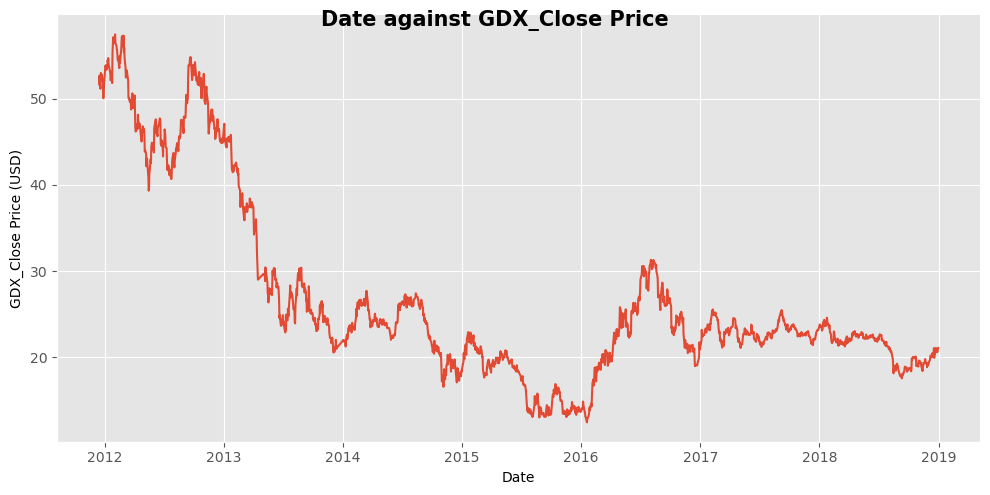

In [20]:
# 'GDX_Close' column line chart
sns.relplot(x='Date', y='GDX_Close', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'GDX_Close Price (USD)').fig.suptitle('Date against GDX_Close Price', fontsize=15, fontweight = 'bold');

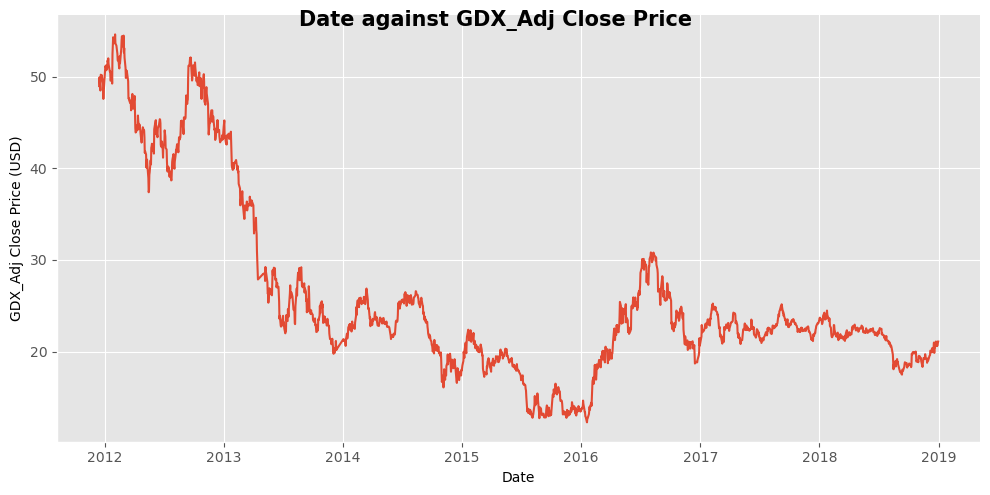

In [21]:
# 'GDX_Adj Close' column line chart
sns.relplot(x='Date', y='GDX_Adj Close', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'GDX_Adj Close Price (USD)').fig.suptitle('Date against GDX_Adj Close Price', fontsize=15, fontweight = 'bold');

#### 2.3.2.2 Crude Oil Related Variables Exploration and Visualisation

##### Brent Crude Oil Futures

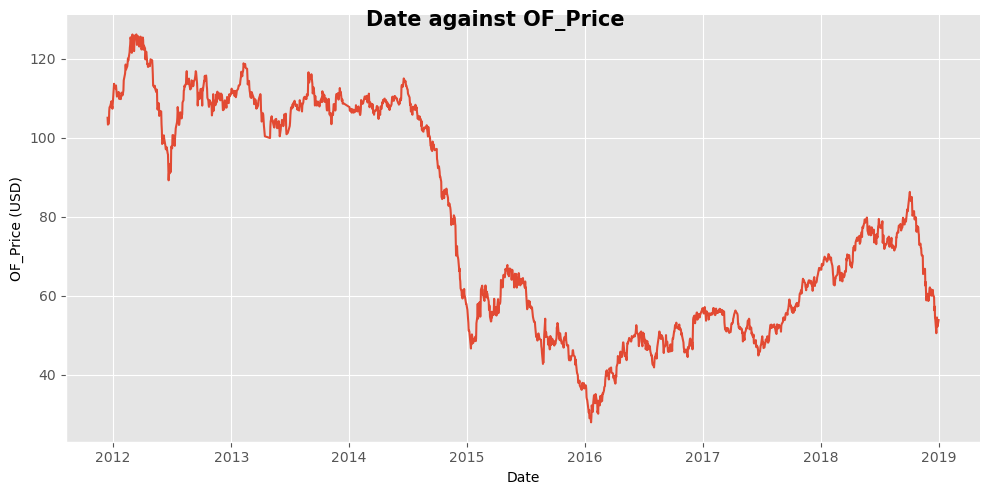

In [22]:
# 'OF_Price' column line chart
sns.relplot(x='Date', y='OF_Price', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'OF_Price (USD)').fig.suptitle('Date against OF_Price', fontsize=15, fontweight = 'bold');

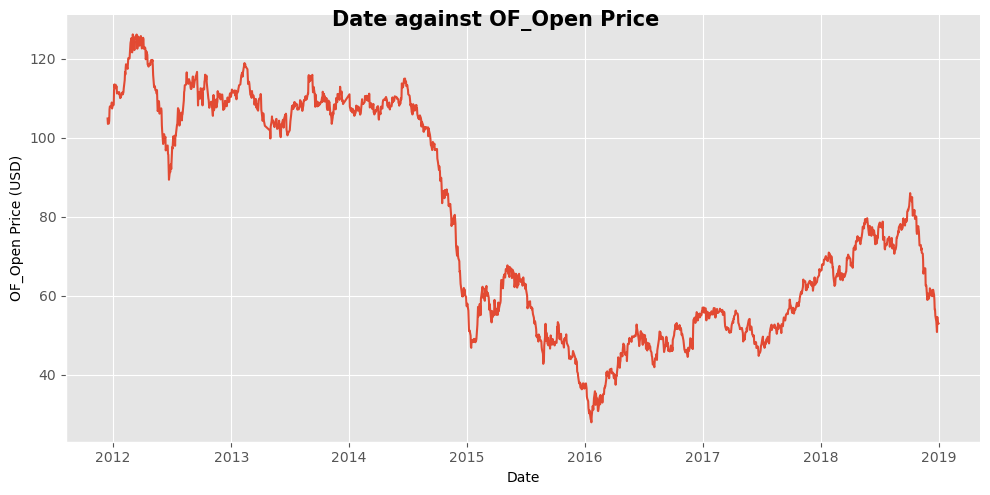

In [23]:
# 'OF_Open' column line chart
sns.relplot(x='Date', y='OF_Open', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'OF_Open Price (USD)').fig.suptitle('Date against OF_Open Price', fontsize=15, fontweight = 'bold');

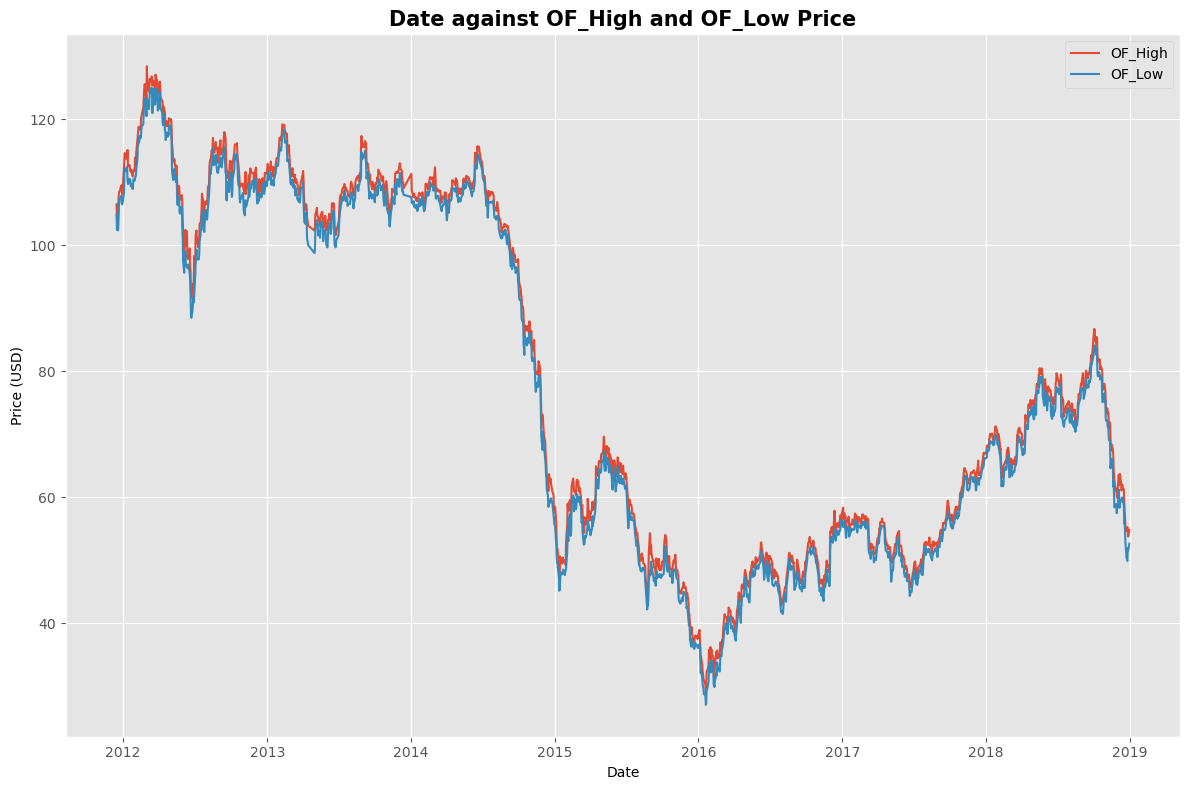

In [24]:
# 'OF_High' and 'OF_Low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='OF_High', data=df, label='OF_High')
sns.lineplot(x='Date', y='OF_Low', data=df, label='OF_Low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against OF_High and OF_Low Price', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### 2.3.2.3 Silver Related Variables Exploration and Visualisation

##### Silver Futures (SF)

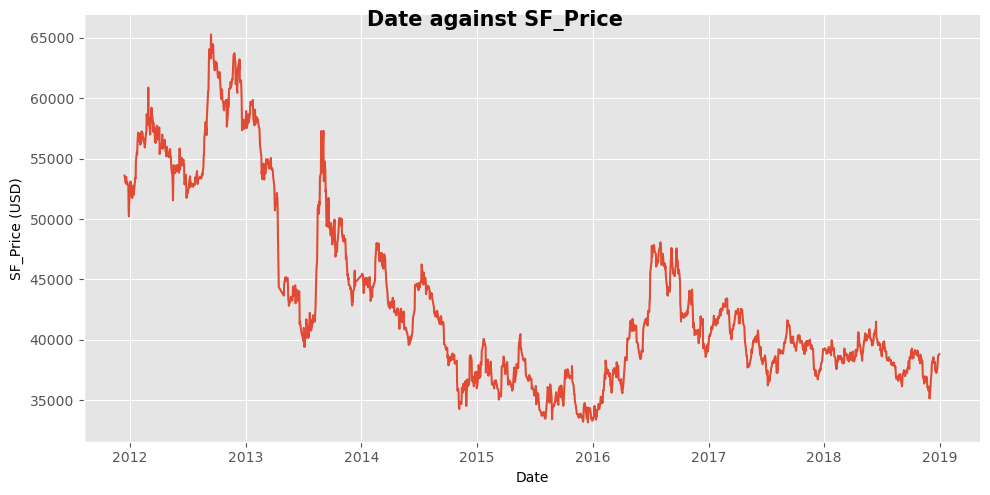

In [25]:
# 'SF_Price' column line chart
sns.relplot(x='Date', y='SF_Price', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'SF_Price (USD)').fig.suptitle('Date against SF_Price', fontsize=15, fontweight = 'bold');

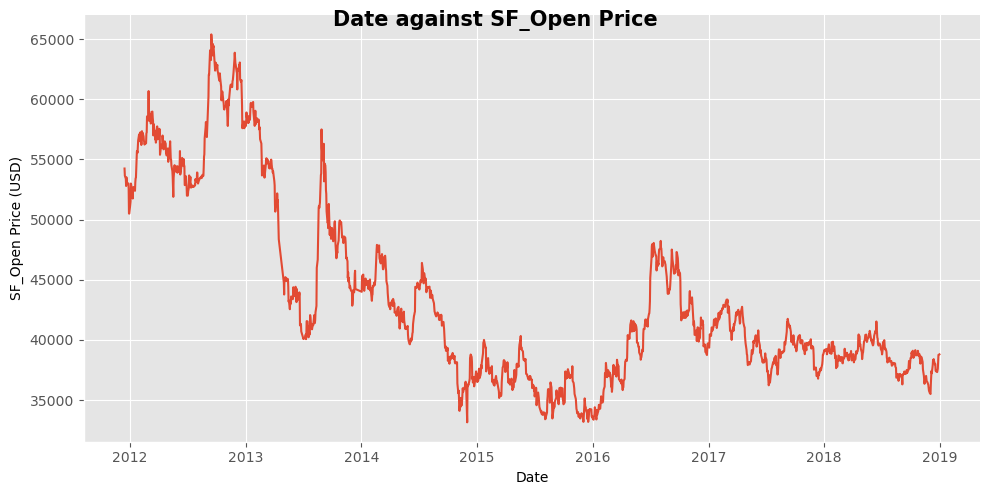

In [26]:
# 'SF_Open' column line chart
sns.relplot(x='Date', y='SF_Open', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'SF_Open Price (USD)').fig.suptitle('Date against SF_Open Price', fontsize=15, fontweight = 'bold');

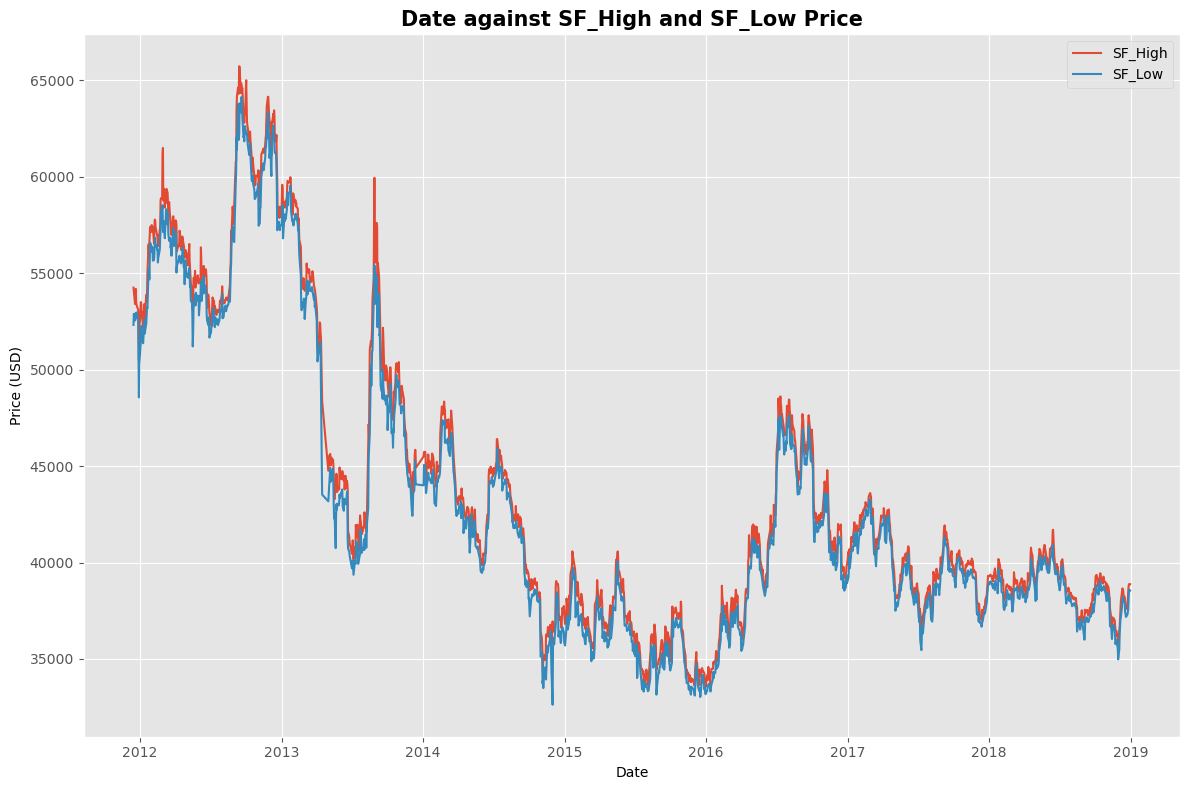

In [27]:
# 'SF_High' and 'SF_Low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='SF_High', data=df, label='SF_High')
sns.lineplot(x='Date', y='SF_Low', data=df, label='SF_Low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against SF_High and SF_Low Price', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

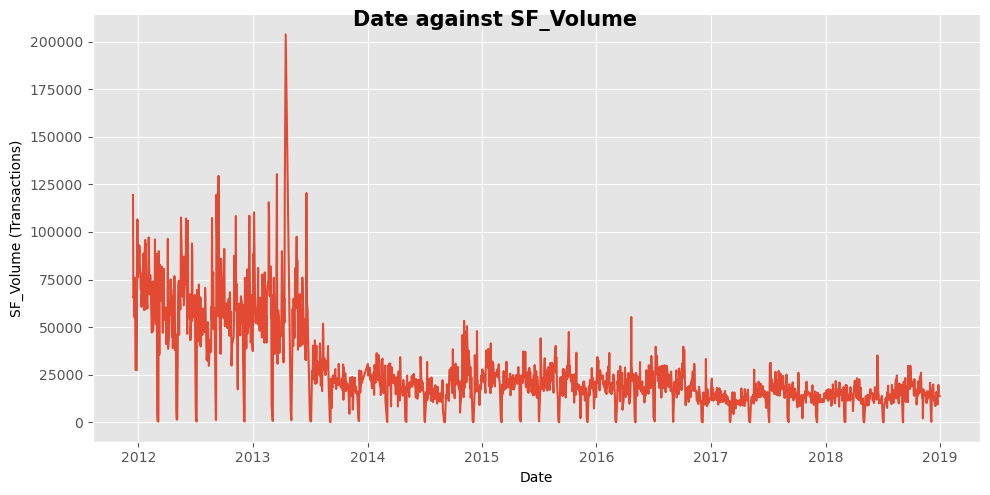

In [28]:
# 'SF_Volume' column line chart
sns.relplot(x='Date', y='SF_Volume', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'SF_Volume (Transactions)').fig.suptitle('Date against SF_Volume', fontsize=15, fontweight = 'bold');

#### 2.3.2.4 US Dollar Index Related Variables Exploration and Visualisation

##### US (United States) dollar Index Price

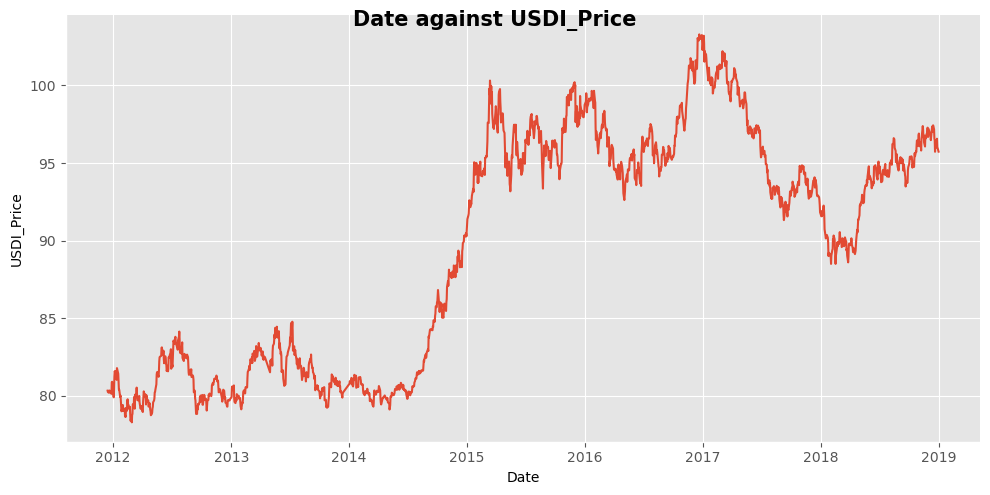

In [29]:
# 'USDI_Price' column line chart
sns.relplot(x='Date', y='USDI_Price', data=df, kind='line', height=5, aspect=2.0).fig.suptitle('Date against USDI_Price', fontsize=15, fontweight = 'bold');

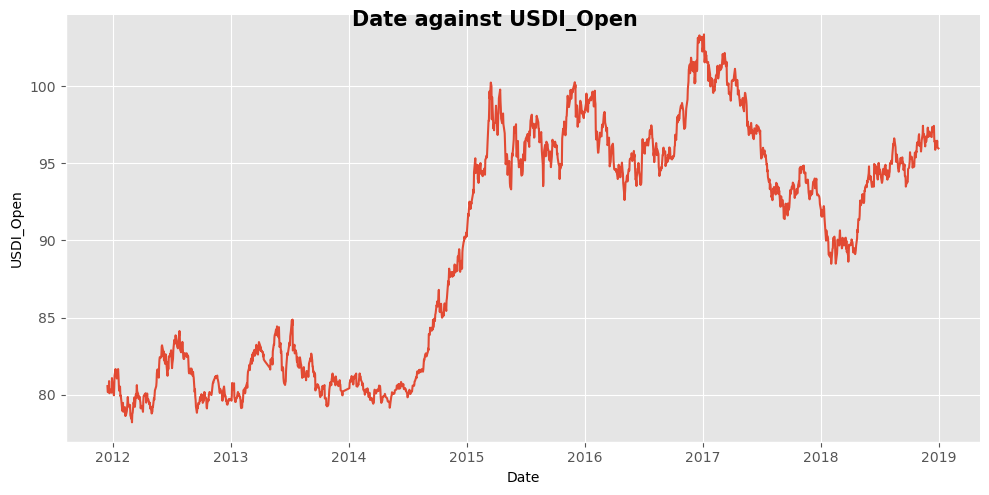

In [30]:
# 'USDI_Open' column line chart
sns.relplot(x='Date', y='USDI_Open', data=df, kind='line', height=5, aspect=2.0).fig.suptitle('Date against USDI_Open', fontsize=15, fontweight = 'bold');

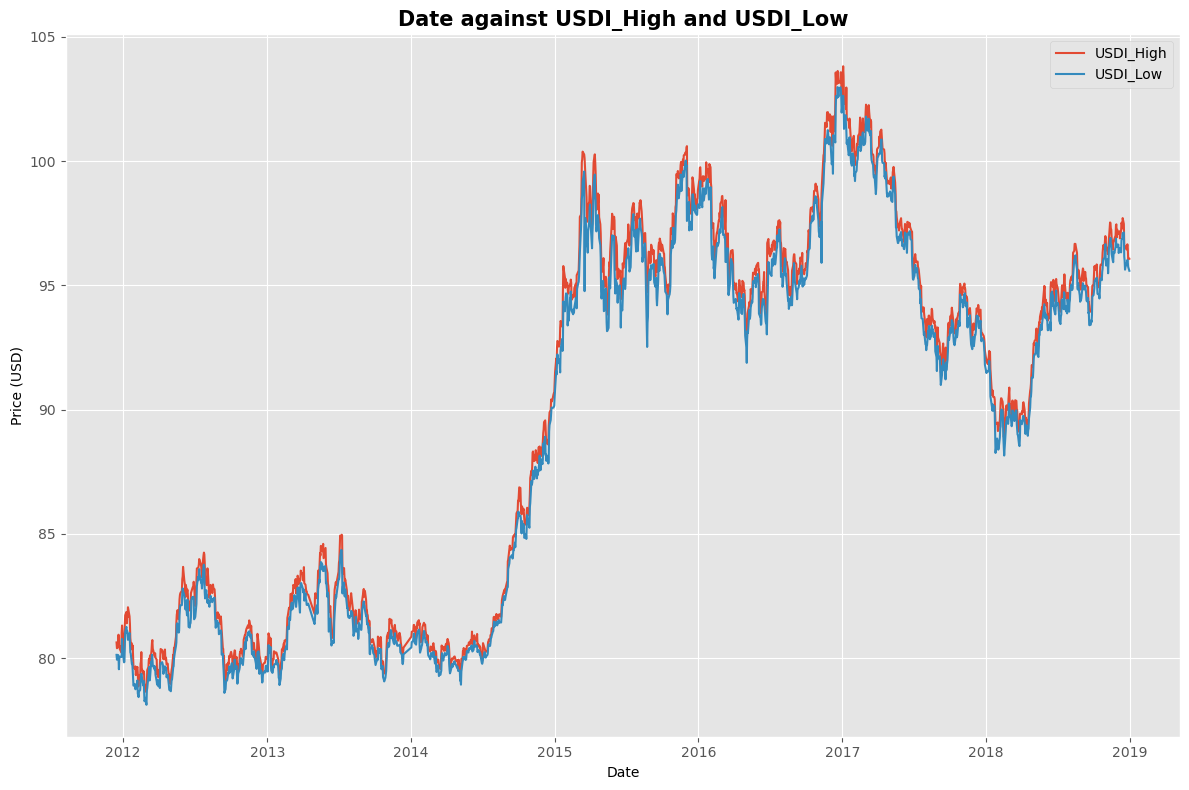

In [31]:
# 'USDI_High' and 'USDI_Low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='USDI_High', data=df, label='USDI_High')
sns.lineplot(x='Date', y='USDI_Low', data=df, label='USDI_Low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against USDI_High and USDI_Low', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### 2.3.2.5 Platinum Related Variables Exploration and Visualisation

##### Platinum Price

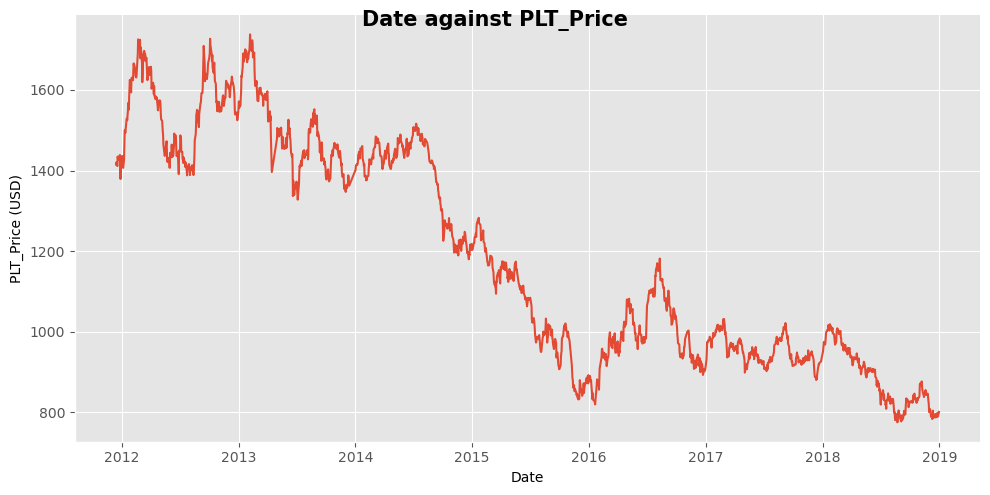

In [32]:
# 'PLT_Price' column line chart
sns.relplot(x='Date', y='PLT_Price', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'PLT_Price (USD)').fig.suptitle('Date against PLT_Price', fontsize=15, fontweight = 'bold');

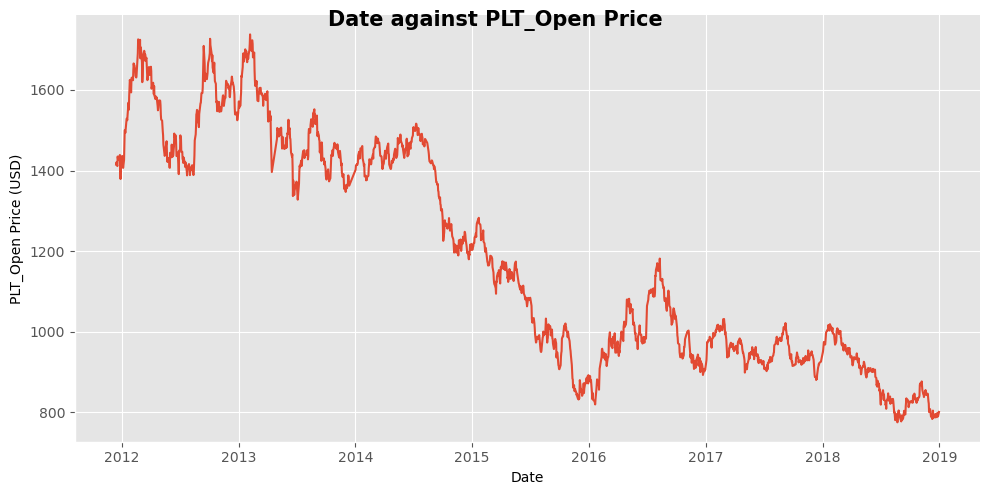

In [33]:
# 'PLT_Open' column line chart
sns.relplot(x='Date', y='PLT_Price', data=df, kind='line', height=5, aspect=2.0).set_axis_labels('Date', 'PLT_Open Price (USD)').fig.suptitle('Date against PLT_Open Price', fontsize=15, fontweight = 'bold');

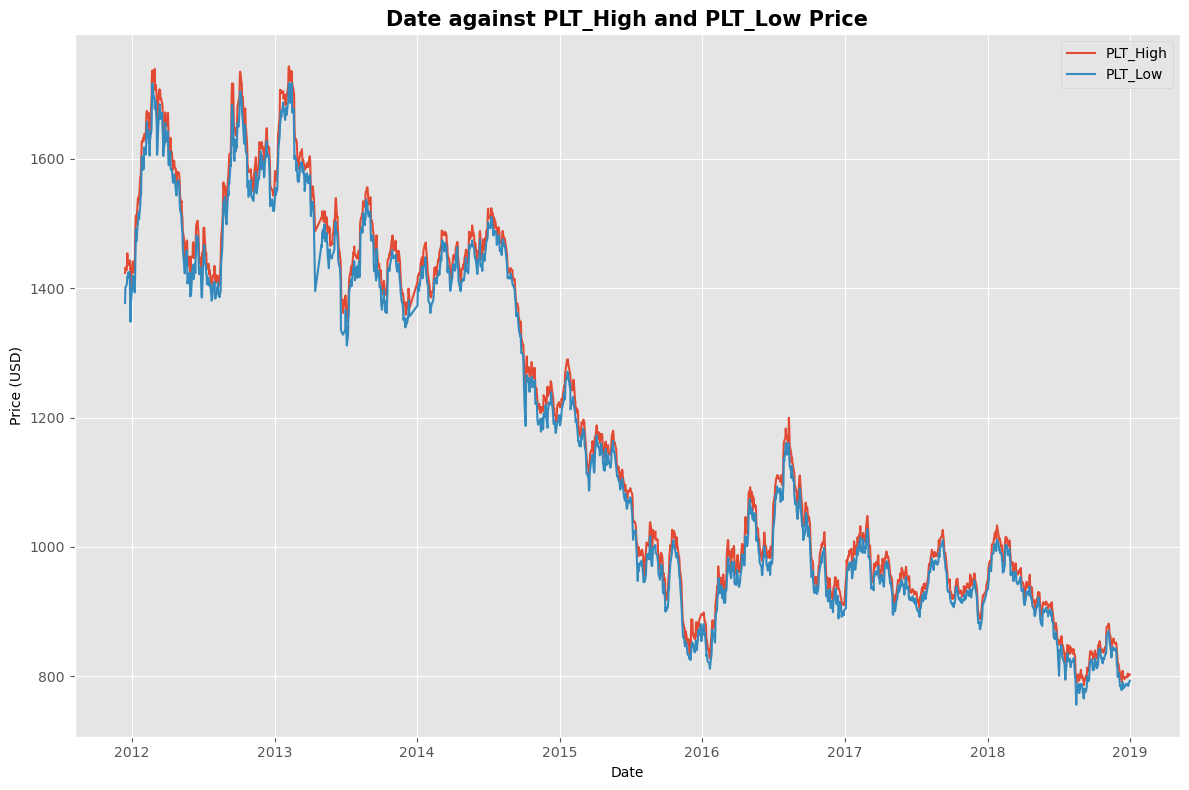

In [34]:
# 'PLT_High' and 'PLT_Low' columns line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='PLT_High', data=df, label='PLT_High')
sns.lineplot(x='Date', y='PLT_Low', data=df, label='PLT_Low')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against PLT_High and PLT_Low Price', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### 2.3.3 Distribution Exploration and Visualisation

In [35]:
#Selecting columns with very strong correlation with target only
#Target variable is 'Adj Close'
#Very Strong is defined as |r| >= 0.7
#heatmap_plot is a data frame used previously to store Pearson Coefficient Correlation, r of data columns

df_correlated = df[heatmap_plot[abs(heatmap_plot['Adj Close'])>=0.7].index.tolist()]
df_correlated.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'EG_open', 'EG_high',
       'EG_low', 'EG_close', 'EG_Ajclose', 'OF_Price', 'OF_Open', 'OF_High',
       'OF_Low', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume',
       'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'USDI_Price',
       'USDI_Open', 'USDI_High', 'USDI_Low', 'GDX_Open', 'GDX_High', 'GDX_Low',
       'GDX_Close', 'GDX_Adj Close'],
      dtype='object')

In [36]:
#Dropping any leftover trend columns
trend_features = ['EU_Trend','OF_Trend','OS_Trend','SF_Trend','USB_Trend','PLT_Trend','PLD_Trend','USDI_Trend']

for column in trend_features:
    if column in df_correlated.columns:
        df_correlated = df_correlated.drop(column, axis='columns')
        
#Dropping any leftover volume columns
volume_features = ['Volume','DJ_volume','EG_volume','OF_Volume','SF_Volume','USDI_Volume','GDX_Volume','USO_Volume']

for column in volume_features:
    if column in df_correlated.columns:
        df_correlated = df_correlated.drop(column, axis='columns')
        
#Trend is not included as it is a technical indicator
#Volume is not included as we concentrate on the price changes only

In [37]:
#Categorize correlated features

gold_correlated_features = ['Open', 'High', 'Low', 'Close', 'Adj Close']
eg_correlated_features = ['EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose']
of_correlated_features = ['OF_Price', 'OF_Open', 'OF_High', 'OF_Low']
sf_correlated_features = ['SF_Price', 'SF_Open', 'SF_High', 'SF_Low']
plt_correlated_features = ['PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low']
usdi_correlated_features = ['USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low']
gdx_correlated_features = ['GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close']

In [38]:
#Function to calculate column to column return

def calc_return(df):
    col_return = (df / df.shift(1)) - 1
    #First col_return marked 0 since no previous value for first day
    #Will be NAN if not marked
    col_return[0] = 0
    return col_return

#Function to concatenate kurtosis with other descriptive statistics

def show_stats(df):
    display(pd.concat([df.describe().transpose(),
                    df.kurtosis().rename("kurtosis")],axis=1).transpose())
    
    #Function to plot histrogram and KDE plot for return of all columns
#To visualize the distribution (ie. Normal or non-Normal)

def plot_returns(df):
    cols_per_row = 3
    num_columns = df.shape[1]
    num_rows = math.ceil(num_columns / cols_per_row)  # Calculate the number of rows for subplots
    
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5*num_rows), squeeze = False)  # Create subplots
    
    for i in range(num_columns):
        row_index = i // cols_per_row
        col_index = i % cols_per_row
        
        ax = axes[row_index, col_index]  # Select the current subplot
        
        ax.hist(df.iloc[:, i], bins=30, density=True,edgecolor='k', alpha=0.5, color='orange')
        sns.kdeplot(df.iloc[:, i], color='red', ax=ax, linewidth=1.7)

        ax.set_xlabel('Return')
        ax.set_ylabel('Frequency')
        ax.set_title(df.columns[i] + ' Return')
    
    # Remove empty subplots
    if num_columns % cols_per_row != 0:
        for i in range(num_columns % cols_per_row, cols_per_row):
            fig.delaxes(axes[-1, i]) 
    
    plt.tight_layout()
    plt.show()
    
#Function to display descriptive statistics and plots of daily return
#Displaying subplot of a group of categorized correlated features

def display_stats_plots(df,title):
    display(HTML(f"<h1 style='text-align:center;'>{title}</h1>"))
    show_stats(df)
    plot_returns(df)

In [39]:
#Compute returns of all correlated features
#Results are stored in a data frame

df_correlated_returns = pd.concat([calc_return(df_correlated.iloc[:, i]) for i in range(df_correlated.shape[1])], axis=1)

#### 2.3.3.1 Gold ETF Daily Returns Exploration and Visualisation

Open         High          Low        Close    Adj Close
count     1718.000000  1718.000000  1718.000000  1718.000000  1718.000000
mean        -0.000100    -0.000103    -0.000088    -0.000087    -0.000087
std          0.009301     0.008953     0.009406     0.009612     0.009612
min         -0.085099    -0.081290    -0.090079    -0.087808    -0.087808
25%         -0.005272    -0.004761    -0.004826    -0.004988    -0.004988
50%         -0.000088    -0.000494     0.000263     0.000000     0.000000
75%          0.005082     0.004188     0.004763     0.004572     0.004572
max          0.053304     0.055187     0.067351     0.074633     0.074633
kurtosis     7.002662     6.909257     9.026573     8.606585     8.606585

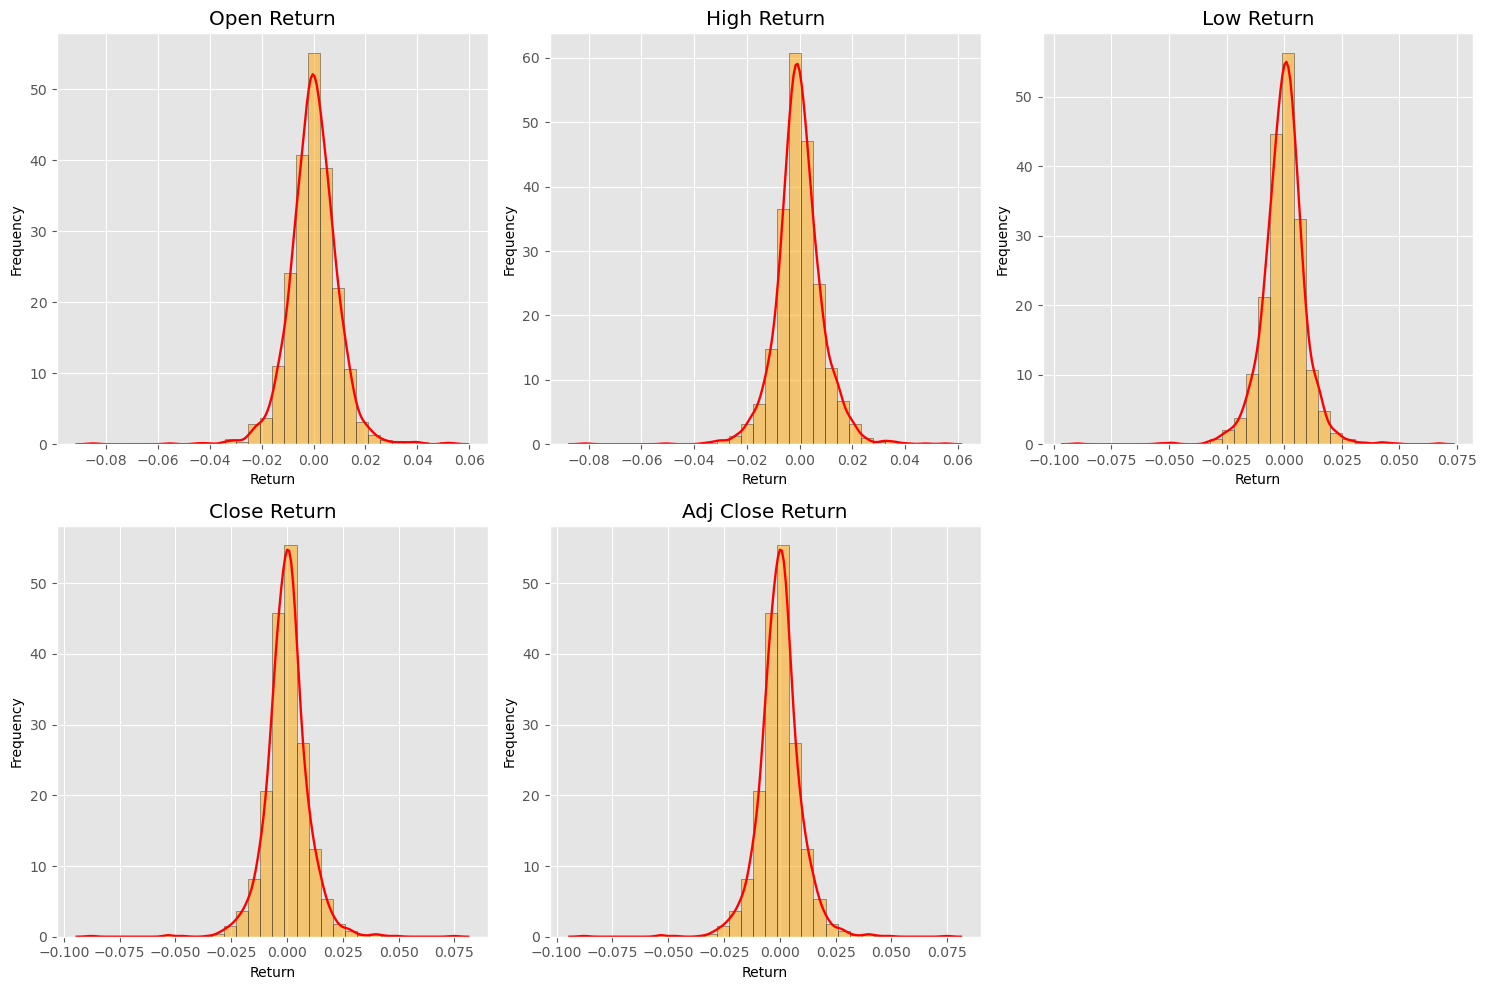

In [40]:
# Gold ETF Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[gold_correlated_features],"Gold ETF Daily Returns")

#### 2.3.3.2 Eldorado Gold Corporation (EGO) Daily Returns Exploration and Visualisation

EG_open      EG_high       EG_low     EG_close   EG_Ajclose
count     1718.000000  1718.000000  1718.000000  1718.000000  1718.000000
mean        -0.001255    -0.001373    -0.001337    -0.001179    -0.001159
std          0.036240     0.032172     0.033314     0.037222     0.037226
min         -0.226586    -0.214501    -0.272300    -0.285714    -0.285714
25%         -0.022133    -0.018391    -0.016935    -0.021910    -0.021910
50%          0.000000    -0.001568     0.000000     0.000000     0.000000
75%          0.018791     0.015176     0.015203     0.019457     0.019457
max          0.190476     0.226131     0.148594     0.196721     0.196721
kurtosis     2.604496     4.218570     6.512428     4.124537     4.124870

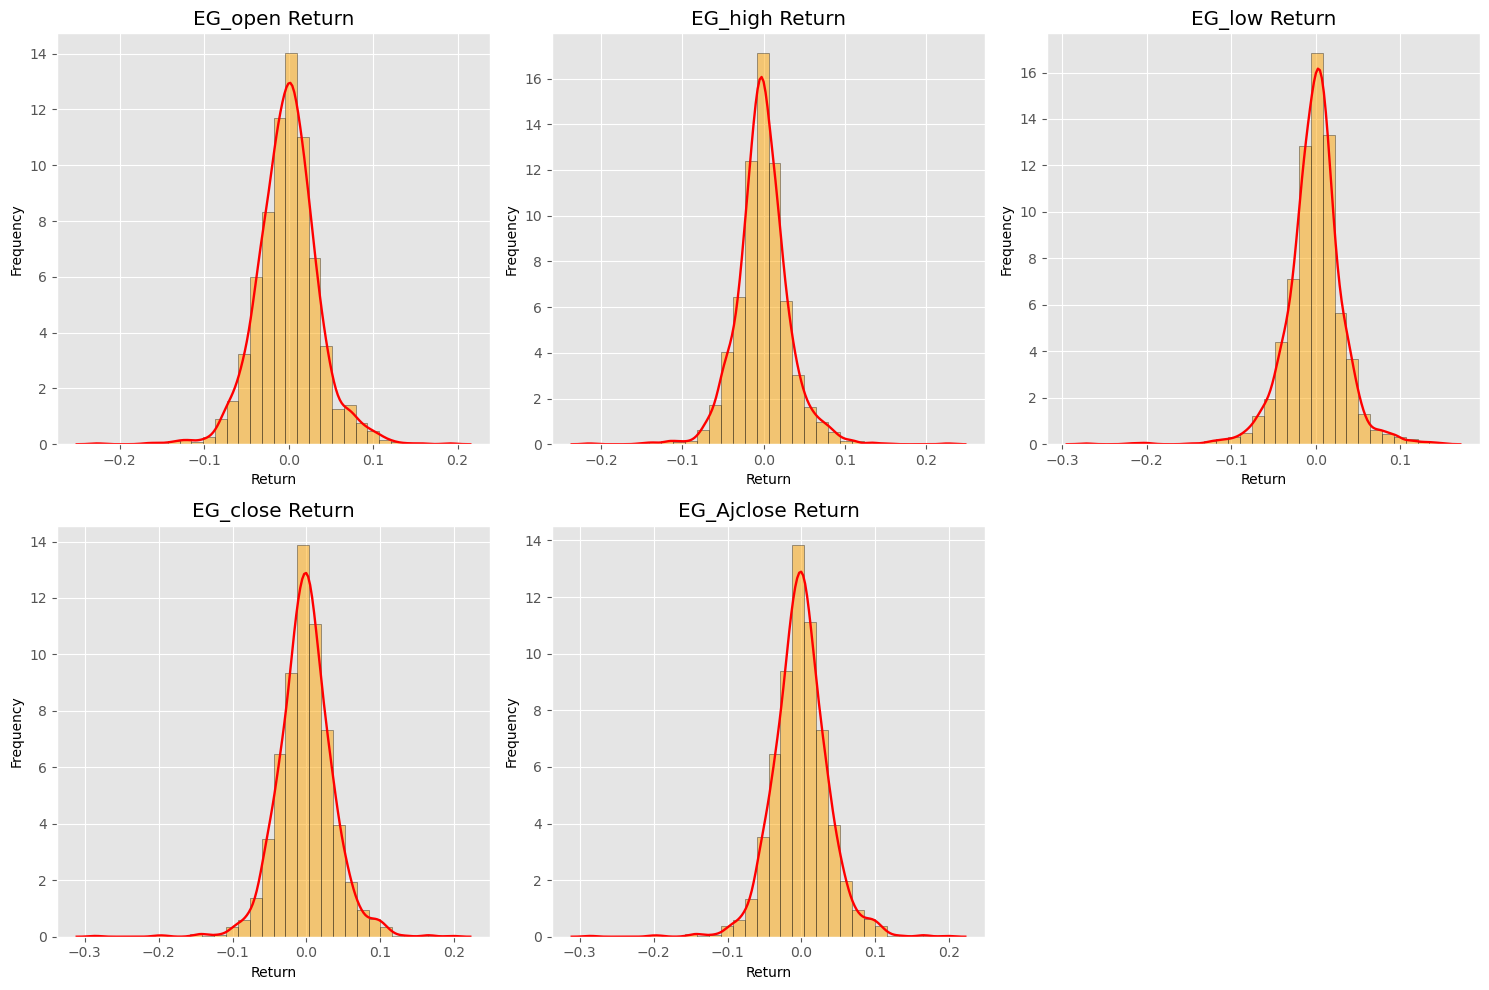

In [41]:
# Eldorado Gold Corporation (EGO) Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[eg_correlated_features],"Eldorado Gold Corporation (EGO) Daily Returns")

#### 2.3.3.3 Brent Crude Oil Futures Daily Returns Exploration and Visualisation

OF_Price      OF_Open      OF_High       OF_Low
count     1718.000000  1718.000000  1718.000000  1718.000000
mean        -0.000190    -0.000218    -0.000257    -0.000262
std          0.020012     0.018967     0.016150     0.016640
min         -0.097749    -0.081255    -0.069110    -0.097283
25%         -0.009783    -0.010236    -0.008668    -0.007981
50%          0.000000    -0.000271    -0.000561     0.000738
75%          0.009121     0.009173     0.006954     0.008108
max          0.109780     0.111302     0.091179     0.107504
kurtosis     3.632066     3.223125     3.813033     4.308727

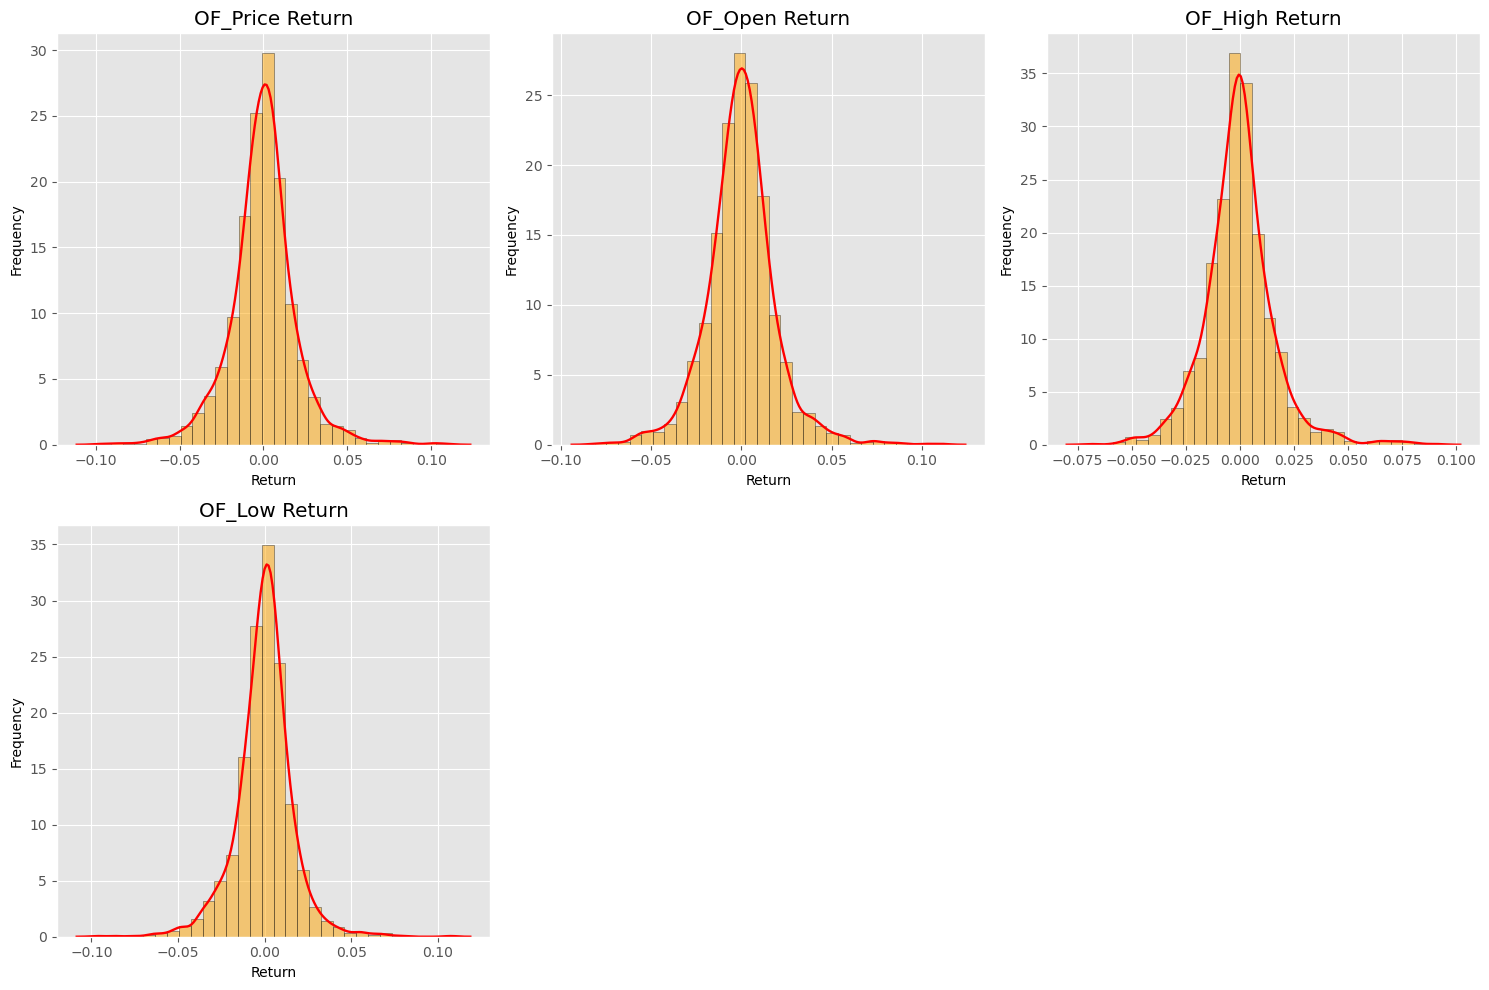

In [42]:
# Brent Crude Oil Futures (OF)) Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[of_correlated_features],"Brent Crude Oil Futures Daily Returns")

#### 2.3.3.4 Silver Futures Daily Returns Exploration and Visualisation

SF_Price      SF_Open      SF_High       SF_Low
count     1718.000000  1718.000000  1718.000000  1718.000000
mean        -0.000091    -0.000108    -0.000115    -0.000094
std          0.013927     0.013248     0.012599     0.012956
min         -0.102205    -0.074717    -0.074717    -0.111796
25%         -0.006578    -0.006665    -0.006600    -0.005936
50%         -0.000386    -0.000052    -0.001330     0.000457
75%          0.006557     0.006028     0.005561     0.006121
max          0.092629     0.092709     0.093061     0.091154
kurtosis     6.104366     6.371318     5.864607     7.734259

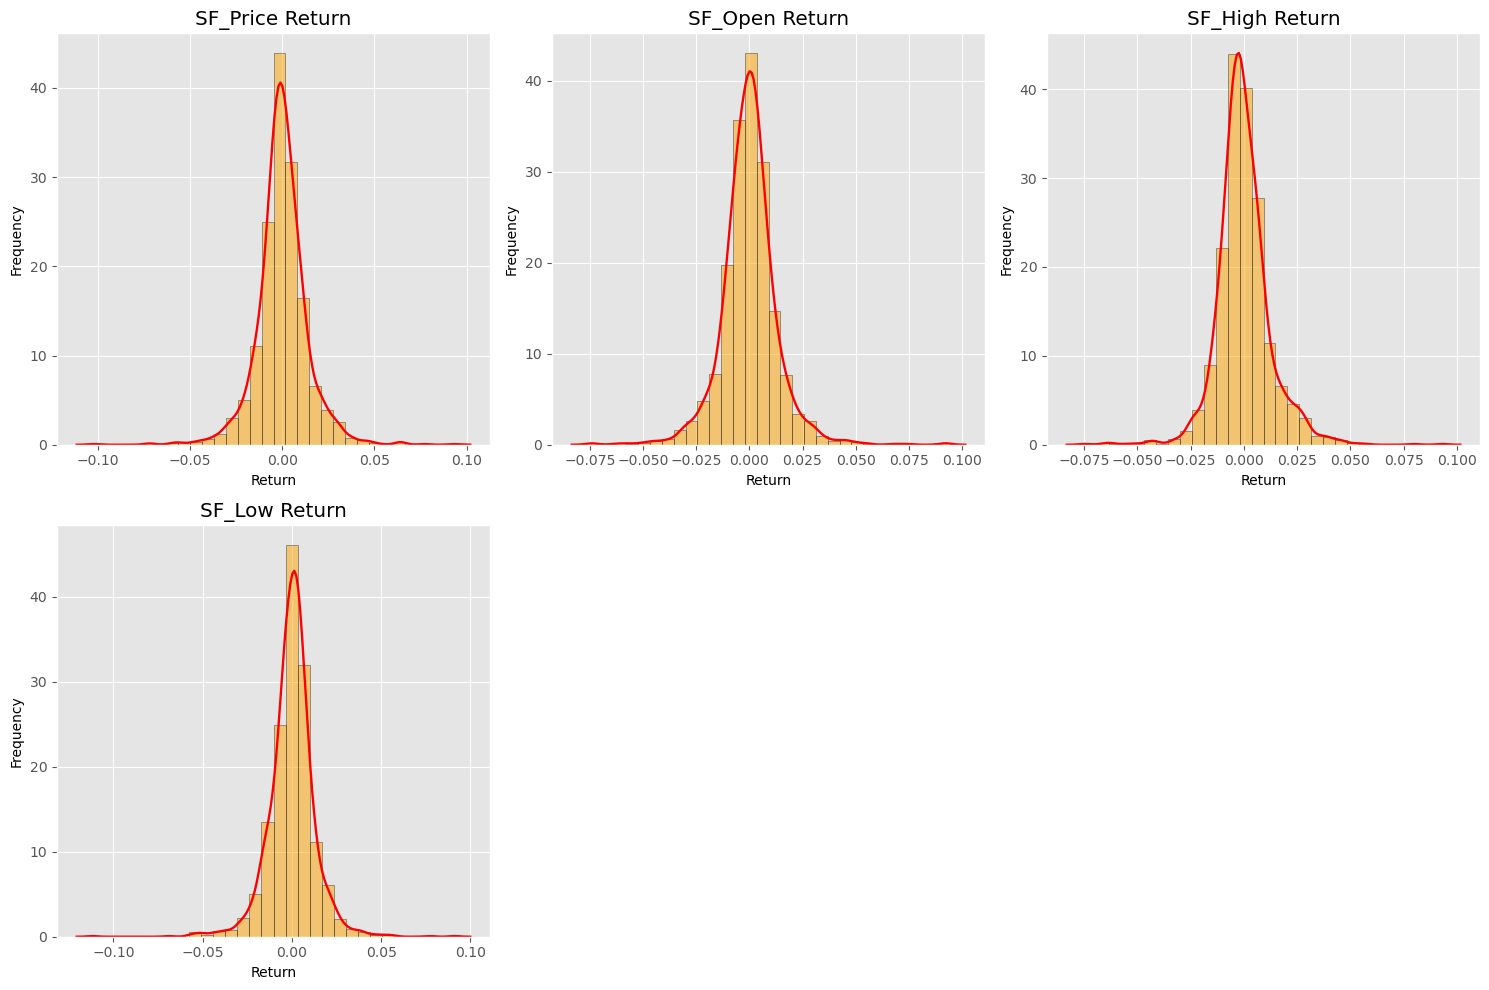

In [43]:
# Silver Futures (SF) Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[sf_correlated_features],"Silver Futures Daily Returns")

#### 2.3.3.5 Platinum Daily Returns Exploration and Visualisation

PLT_Price     PLT_Open     PLT_High      PLT_Low
count     1718.000000  1718.000000  1718.000000  1718.000000
mean        -0.000263    -0.000269    -0.000283    -0.000259
std          0.011645     0.011702     0.010037     0.011097
min         -0.060681    -0.052807    -0.056929    -0.061257
25%         -0.007473    -0.007294    -0.006189    -0.006622
50%         -0.000130    -0.000309    -0.000578     0.000051
75%          0.006525     0.006674     0.005082     0.005874
max          0.058657     0.051062     0.044709     0.051172
kurtosis     1.628517     1.437636     1.704495     2.559373

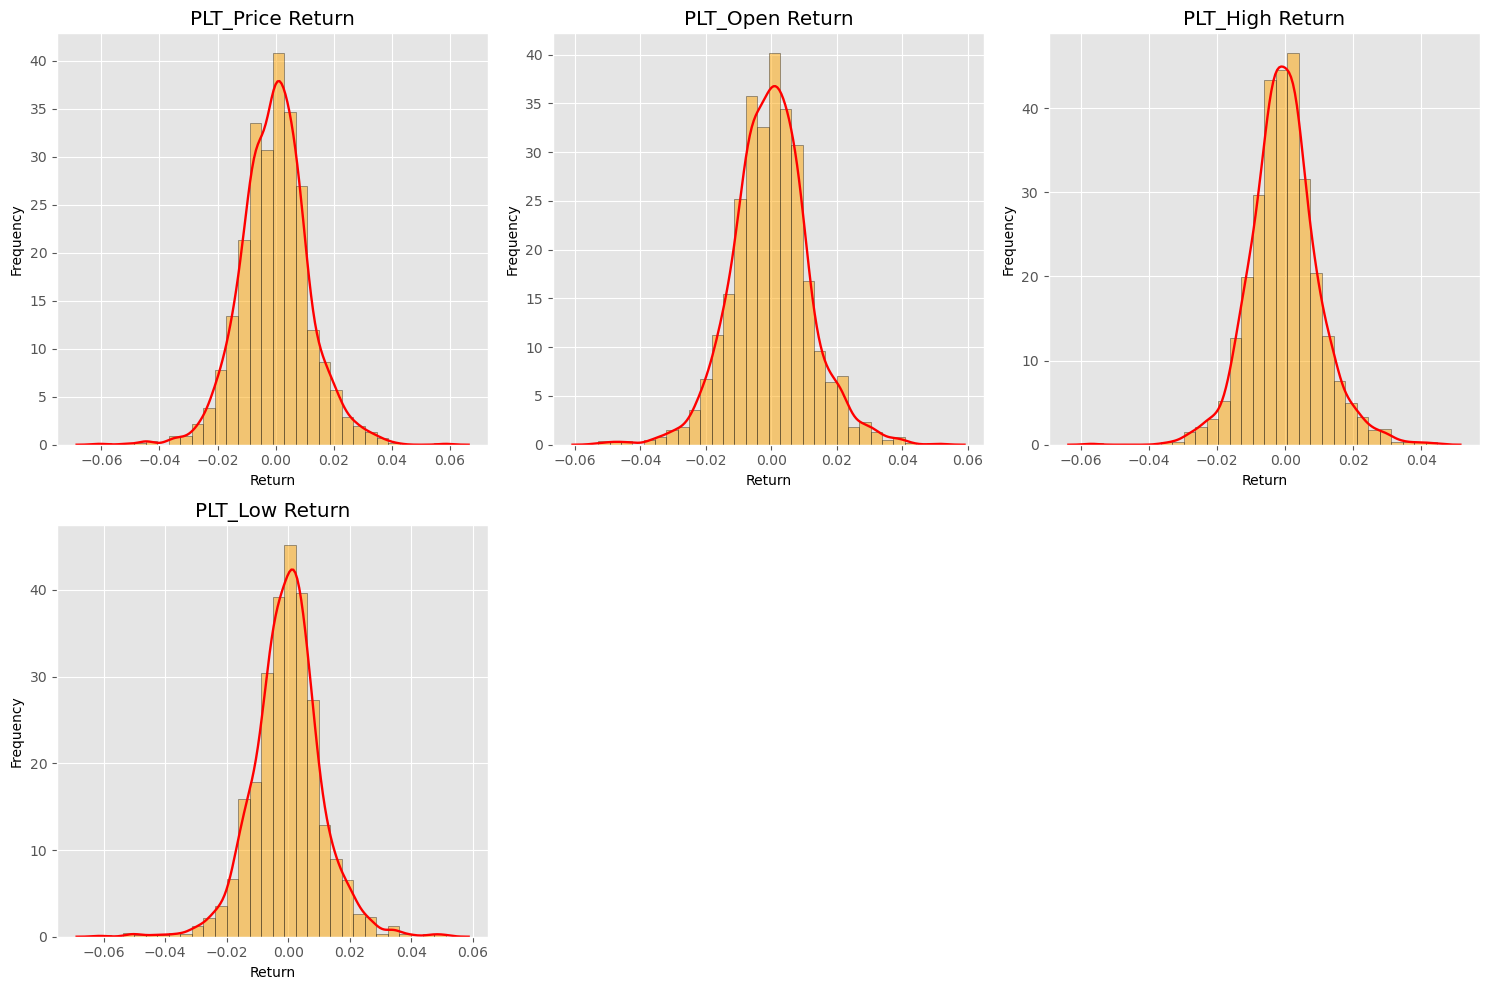

In [44]:
# Platinum (PLT) Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[plt_correlated_features],"Platinum Daily Returns")

#### 2.3.3.6 US Dollar Index Daily Returns Exploration and Visualisation 

USDI_Price    USDI_Open    USDI_High     USDI_Low
count     1718.000000  1718.000000  1718.000000  1718.000000
mean         0.000112     0.000112     0.000110     0.000112
std          0.004423     0.004536     0.003986     0.004356
min         -0.023855    -0.023623    -0.019732    -0.048353
25%         -0.002495    -0.002562    -0.002059    -0.002163
50%          0.000150     0.000160     0.000062     0.000195
75%          0.002620     0.002811     0.002377     0.002376
max          0.021887     0.025227     0.032293     0.027436
kurtosis     1.588515     2.059785     3.888674    12.431885

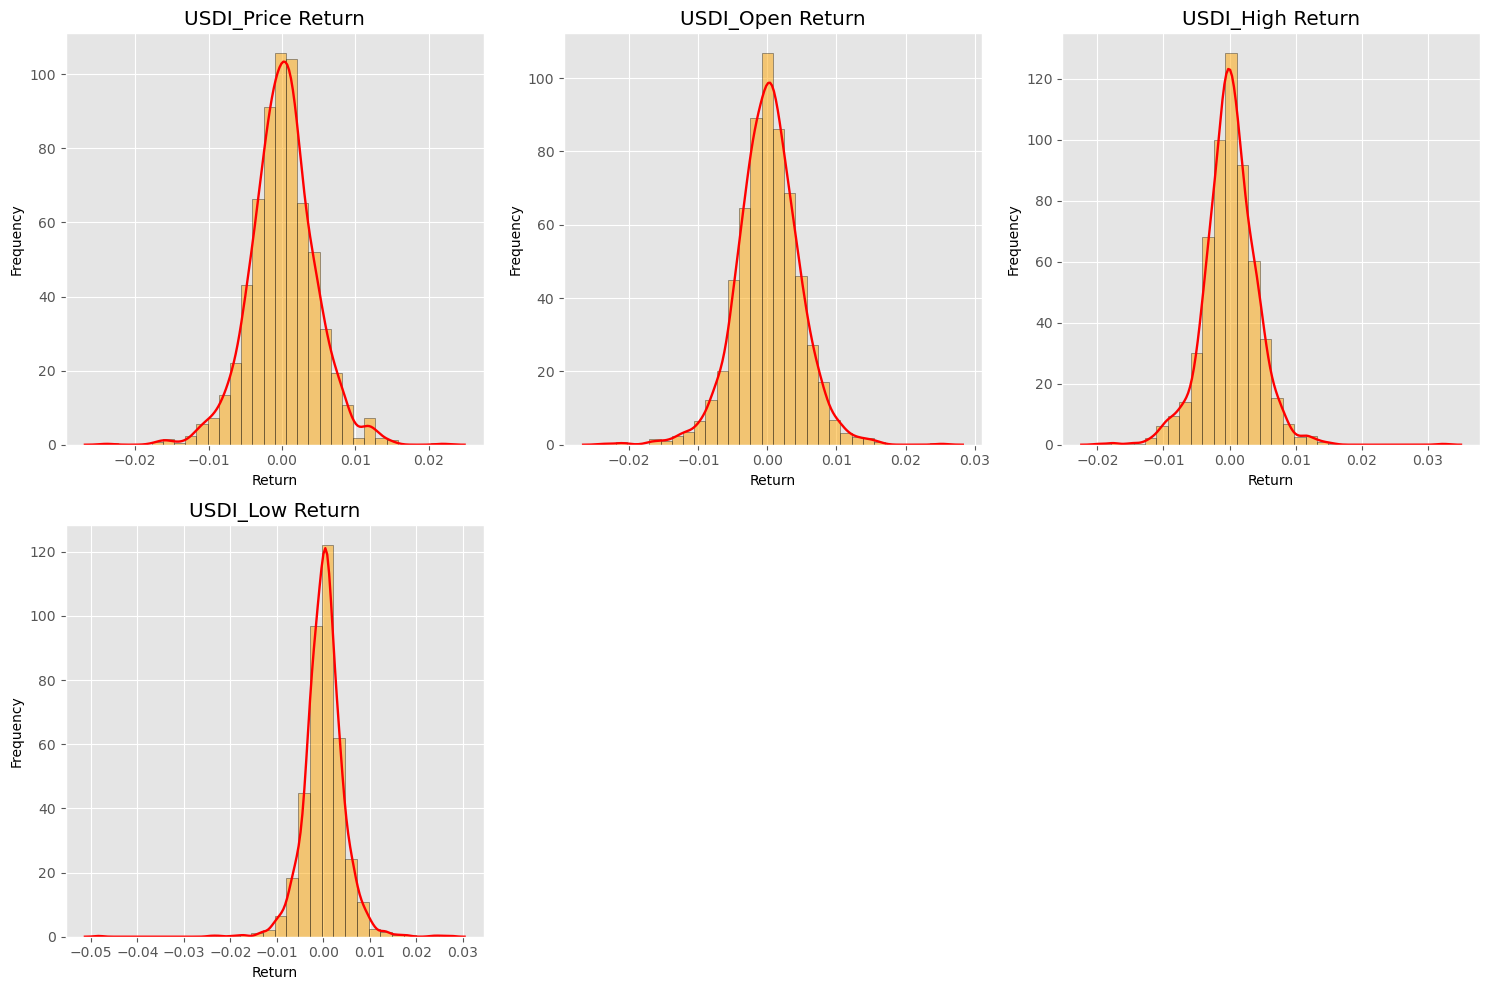

In [45]:
# US Dollar Index (USDI) Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[usdi_correlated_features],"US Dollar Index Daily Returns")

#### 2.3.3.7 Gold Miners ETF Daily Returns Exploration and Visualisation

GDX_Open     GDX_High      GDX_Low    GDX_Close  GDX_Adj Close
count     1718.000000  1718.000000  1718.000000  1718.000000    1718.000000
mean        -0.000271    -0.000324    -0.000303    -0.000222      -0.000190
std          0.023528     0.020629     0.021523     0.024500       0.024514
min         -0.157354    -0.105998    -0.109292    -0.106935      -0.106935
25%         -0.013511    -0.011659    -0.011464    -0.013896      -0.013896
50%         -0.000912    -0.001472     0.000000    -0.000466      -0.000460
75%          0.012321     0.009839     0.010587     0.012837       0.012940
max          0.119447     0.104512     0.120103     0.127517       0.127517
kurtosis     3.368450     3.055771     3.494199     1.919815       1.911552

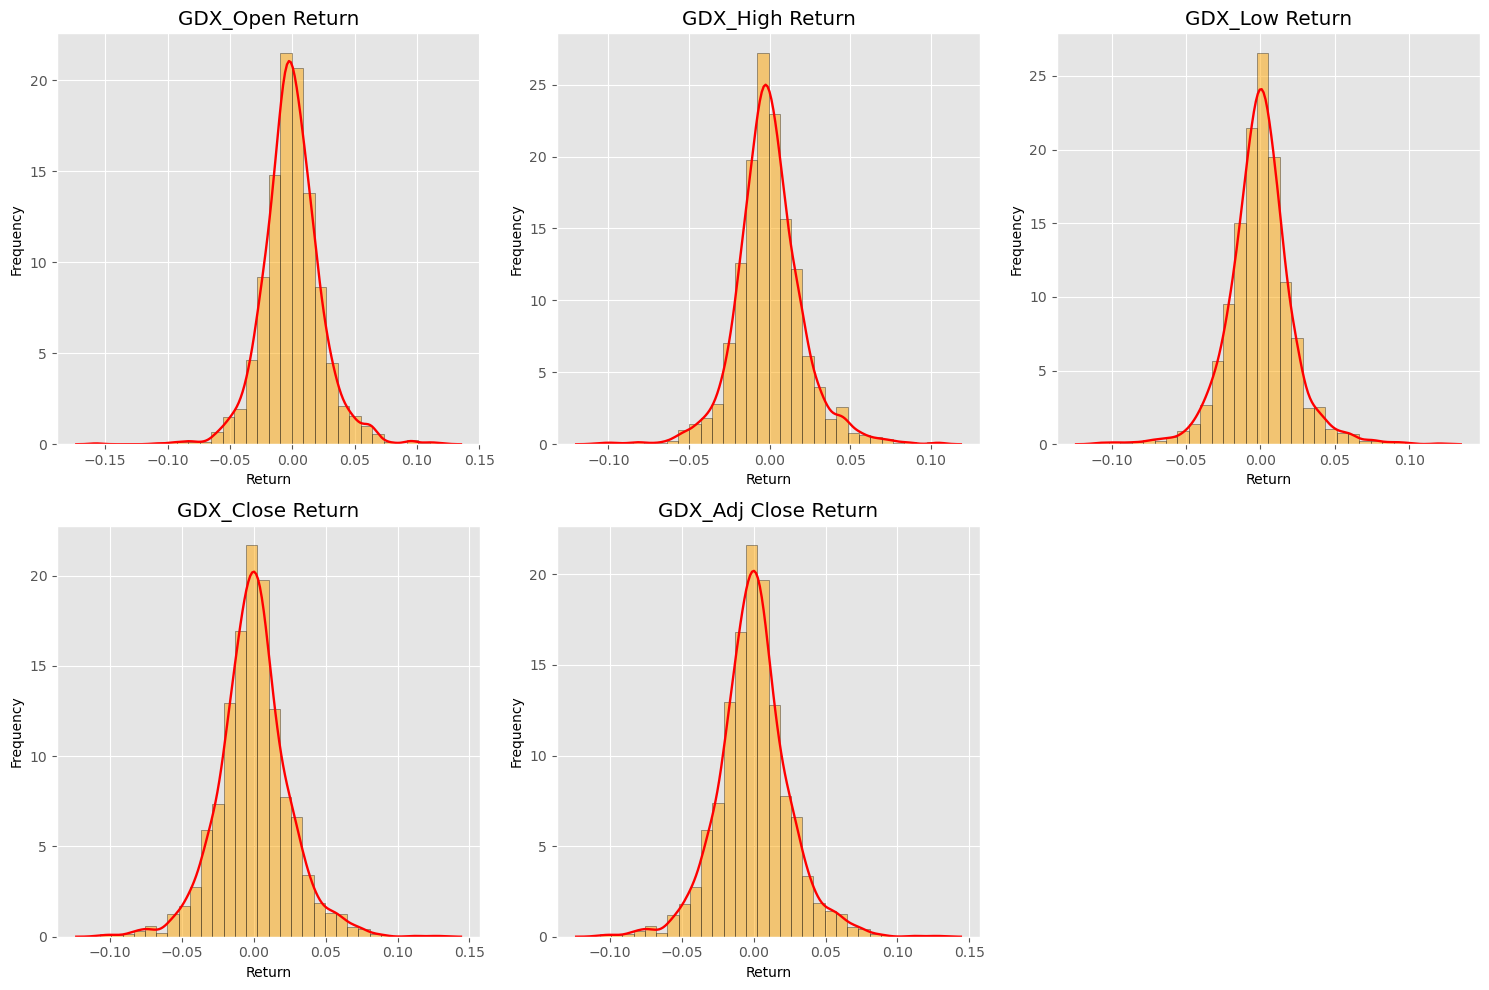

In [46]:
# Gold Miners ETF (GDX) Columns Daily Return Exploration and Visualisation
display_stats_plots(df_correlated_returns[gdx_correlated_features],"Gold Miners ETF Daily Returns") 

## 2.4 Data Quality Detection

### 2.4.1 Null Data Detection

In [47]:
#Check if there are null values in the dataset
df.isnull().any().any()

False

### 2.4.2 Duplicate Data Detection

In [48]:
#Check if there are duplicated date
df['Date'].nunique()

1718

### 2.4.3 Outliers Detection (r Related Columns)

In [49]:
def identify_and_display_outliers(df, df_returns, threshold=3):
    
    for column in df_returns.columns:
        
        # Calculate Z-scores for the current column
        z_scores = stats.zscore(df_returns[column])

        # Find the indexes of outliers based on the threshold
        outlier_indexes = np.where(abs(z_scores) > threshold)[0]

        if len(outlier_indexes) > 0:
            
            column_name = f"Column: {column}"
            outlier_data = [(df.iloc[i]['Date'], df_returns[column][i]) for i in outlier_indexes]
            
            # Create a DataFrame for the outliers in the current column
            df_outliers = pd.DataFrame(outlier_data, columns=['Outlier Date', 'Return'])
            
            # Display the outliers for the current column
            display(HTML(f"<h2>{column_name}</h2><hr />"))
            display(HTML(df_outliers.to_html()))

#### 2.4.3.1 Gold ETF Daily Return Outliers

In [50]:
# Gold ETF Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[gold_correlated_features])

#### 2.4.3.2 Eldorado Gold Corporation (EGO) Daily Return Outliers

In [51]:
# Eldorado Gold Corporation (EGO) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[eg_correlated_features])

#### 2.4.3.3 Brent Crude Oil Futures Daily Return Outliers

In [52]:
# Brent Crude Oil Futures (OF)) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[of_correlated_features])

#### 2.4.3.4 Silver Futures Daily Return Outliers

In [53]:
# Silver Futures (SF) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[sf_correlated_features])

#### 2.4.3.5 Platinum Daily Return Outliers

In [54]:
# Platinum (PLT) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[plt_correlated_features])

#### 2.4.3.6 US Dollar Index Daily Return Outliers

In [55]:
# US Dollar Index (USDI) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[usdi_correlated_features])

#### 2.4.3.7 Gold Miners ETF Daily Return Outliers

In [56]:
# Gold Miners ETF (GDX) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df, df_correlated_returns[gdx_correlated_features])

# 3.0 Data Preparation

## 3.1 Data Selection

### 3.1.1 Data Selection by Coefficient Correlation Approach

-- No code available for this section --

### 3.1.2 Selecting data using Mutual Information Approach

In [57]:
#Mutual information
columns_to_drop =['Date','Adj Close']
mi_features = df.drop(columns = columns_to_drop)
mi_target = df['Adj Close']

#calculate mutual information
mi_selector = SelectKBest(score_func=mutual_info_regression, k=32)
mi_selector.fit(mi_features, mi_target)

# Get the indices of the selected features
selected_feature_indices = mi_selector.get_support(indices=True)

# Get the selected feature names
selected_features = [mi_features.columns[i] for i in selected_feature_indices]

selected_features

['Open',
 'High',
 'Low',
 'Close',
 'SP_open',
 'SP_high',
 'SP_low',
 'SP_close',
 'SP_Ajclose',
 'DJ_open',
 'DJ_high',
 'DJ_low',
 'DJ_close',
 'DJ_Ajclose',
 'EG_open',
 'EG_high',
 'EG_low',
 'EG_close',
 'EG_Ajclose',
 'SF_Price',
 'SF_Open',
 'SF_High',
 'SF_Low',
 'PLT_Price',
 'PLT_High',
 'PLT_Low',
 'USDI_Low',
 'GDX_Open',
 'GDX_High',
 'GDX_Low',
 'GDX_Close',
 'GDX_Adj Close']

### 3.1.3 Rationale of Inclusion

-- No code available for this section --

### 3.1.4 Summary of Selected Data

-- No code available for this section --

## 3.2 Data Cleaning

-- No code available for this section --

### 3.2.1 Outliers Detection (MI Related Columns)

In [58]:
#Listing out correlated columns and mutual information related columns
r_related_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose',
                     'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume',
                     'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low',
                     'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close']
mi_related_columns =['Open', 'High', 'Low', 'Close', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'DJ_open',
                     'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose',
                     'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'PLT_Price', 'PLT_High', 'PLT_Low', 'RHO_PRICE', 'GDX_Open',
                     'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close']

In [59]:
#To filter out columns whose distribution have not been identified
extra_included_columns = list(set(mi_related_columns) - set(r_related_columns))
extra_included_columns

['DJ_high',
 'DJ_close',
 'DJ_low',
 'DJ_open',
 'SP_high',
 'DJ_Ajclose',
 'SP_Ajclose',
 'SP_close',
 'SP_low',
 'SP_open',
 'RHO_PRICE']

In [60]:
#Since no volume or trend columns included, all newly included columns will be selected
#To select extra included columns
df_mi_related = df[extra_included_columns]

In [61]:
#Found out that the column 'RHO_price' is included, will be handled seperately
df_mi_related = df_mi_related.drop(columns = 'RHO_PRICE')
rho = df['RHO_PRICE']

In [62]:
#To calculate daily returns for newly included features

df_mi_returns = pd.concat([calc_return(df_mi_related.iloc[:, i]) for i in range(df_mi_related.shape[1])], axis=1)

In [63]:
#Categorize newly included mutual information related features

sp_mi_features = ['SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose']
dj_mi_features = ['DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose']

#### 3.2.1.1 Standard & Poor’s 500 Daily Return Outliers

In [64]:
# Standard & Poor’s 500 (SP) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df,df_mi_returns[sp_mi_features])

#### 3.2.1.2 Dow Jones Index Daily Return Outliers

In [65]:
# Dow Jones (DJ) Columns Daily Return Outliers with Dates
identify_and_display_outliers(df,df_mi_returns[dj_mi_features])

### 3.2.2 Handling Outliers

-- No code available for this section --

### 3.2.3 Handling Zero Values

In [66]:
# To display number of zero values in 'RHO_PRICE'
num_of_zeros = (rho == 0).sum()
print("Number of zero values:",num_of_zeros)

#To display percentage of occurence of zero value in 'RHO_PRICE'
percent_zero_occurence = round((rho == 0).sum() / rho.count() * 100, 2)
print("Percentage of occurence of zero value:", percent_zero_occurence, '%')

Number of zero values: 132
Percentage of occurence of zero value: 7.68 %


In [67]:
# Replace zero values with NaN for linear interpolation
rho = rho.replace(0, float('nan'))

# Use linear interpolation to fill NaN values
rho = pd.DataFrame(rho.interpolate(method='linear'))
rho

RHO_PRICE
0        1425.0
1        1400.0
2        1400.0
3        1400.0
4        1400.0
...         ...
1713     2480.0
1714     2480.0
1715     2470.0
1716     2460.0
1717     2460.0

[1718 rows x 1 columns]

In [68]:
# Double check if 'RHO_PRICE' still having any zero values
(rho == 0).any().any()

False

## 3.3 Data Construction

### 3.3.1 Simple Moving Average (SMA)

In [69]:
# Function for calculating Simple Moving Average (SMA)
def calculate_sma(periods = 15):
    sma = df['Adj Close'].rolling(window=periods).mean()
    return sma

sma = calculate_sma()
sma

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1713    117.852667
1714    118.069333
1715    118.299333
1716    118.560667
1717    118.771333
Name: Adj Close, Length: 1718, dtype: float64

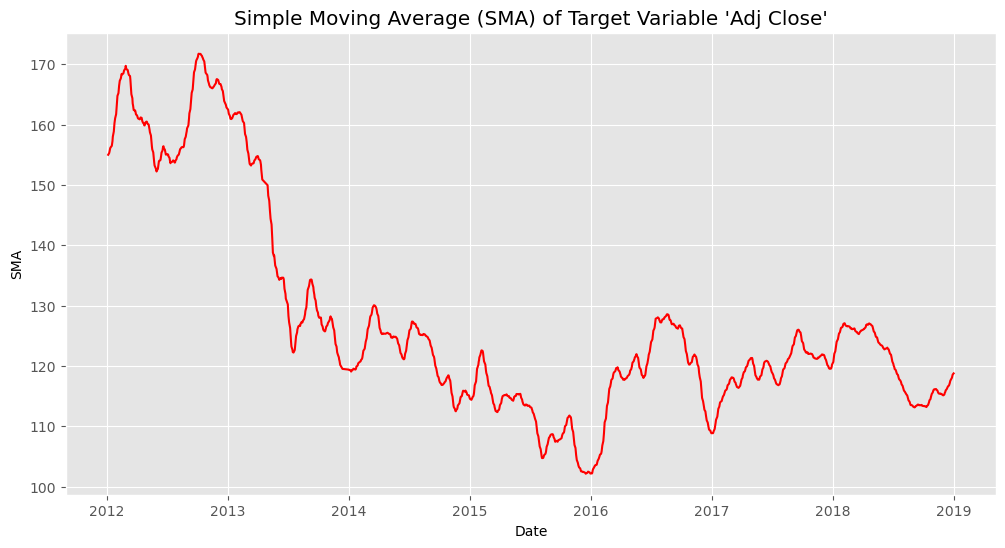

In [70]:
# Visualise SMA using line chart
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), sma, label='SMA', color='red')
plt.xlabel('Date')
plt.ylabel('SMA')
plt.xticks(fontsize = 10)
plt.title("Simple Moving Average (SMA) of Target Variable 'Adj Close'")
plt.show()

### 3.3.2 Moving Average Convergence/Divergence (MACD)

In [71]:
#Function for calculating Moving Average Convergence Divergence (MACD)
#speriod is 12 days by default, lperiod is 26 days by default
def calc_MACD(df, short_period = 12, long_period = 26, signal_period = 9):
    fast_EMA = df.ewm(span = short_period, min_periods = short_period, adjust = True).mean()
    
    slow_EMA = df.ewm(span = long_period, min_periods = long_period, adjust = True).mean()
    
    MACD = fast_EMA - slow_EMA
    
    signal = MACD.ewm(span = signal_period, min_periods = signal_period, adjust = True).mean()
    
    return MACD, signal

MACD, signal= calc_MACD(df['Adj Close'])
MACD

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1713    0.889990
1714    0.946924
1715    1.053331
1716    1.163783
1717    1.252214
Name: Adj Close, Length: 1718, dtype: float64

In [72]:
signal

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1713    0.682093
1714    0.735059
1715    0.798713
1716    0.871727
1717    0.947825
Name: Adj Close, Length: 1718, dtype: float64

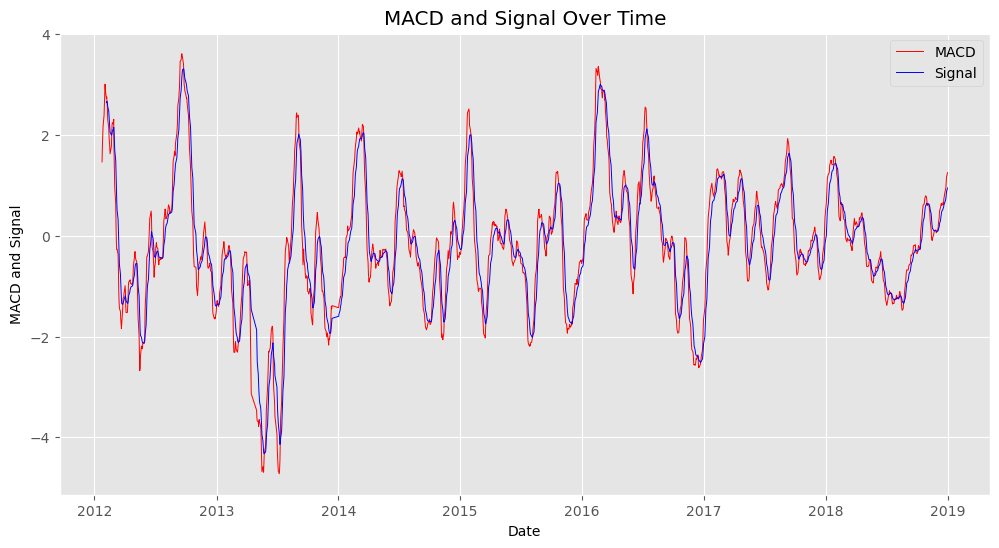

In [73]:
#To display line chart to show MACD and Signal against time
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), MACD, label='MACD', color='red', linewidth = 0.7)
plt.plot(pd.to_datetime(df['Date']), signal, label='Signal', color='blue', linewidth = 0.7)
plt.xlabel('Date')
plt.ylabel('MACD and Signal')
plt.xticks(fontsize = 10)
plt.title('MACD and Signal Over Time')
plt.legend()
plt.show()

### 3.3.3 Relative Strength Index (RSI)

In [74]:
# Calculate RSI

#1.Calculate price changes
price_changes = df['Adj Close'].diff()

#2.Seperate gain and lost
gains = price_changes.where(price_changes>0,0)
losses = -price_changes.where(price_changes<0,0)

#3.Calculate average gain and lost
avg_gain = gains.rolling(window=15).mean()
avg_loss = losses.rolling(window=15).mean()

#4.Calculate RS
rs = avg_gain / avg_loss

#5.Calculate RSI
rsi = 100 - (100 / (1 + rs))

rsi

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1713    73.529415
1714    68.035556
1715    68.729672
1716    70.247973
1717    67.713059
Name: Adj Close, Length: 1718, dtype: float64

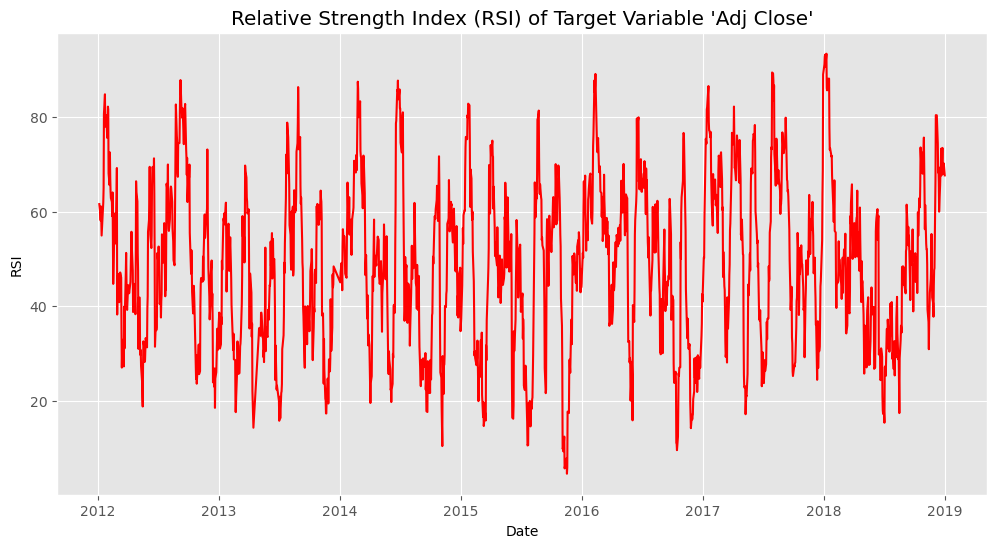

In [75]:
# Visualise RSI using Line chart
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), rsi, label='RSI', color='red')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(fontsize = 10)
plt.title("Relative Strength Index (RSI) of Target Variable 'Adj Close'")
plt.show()

### 3.3.4 Bollinger Bands 

In [76]:
def calculate_sma(periods=15):
    sma = df['Adj Close'].rolling(window=periods).mean()
    return sma

def calculate_bb(df, periods=15):
    STD = df.rolling(window=periods,min_periods=periods, center=False).std()
    SMA = calculate_sma(15)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band, SMA

# Calculate Bollinger Bands for Gold
upper_band, lower_band, SMA = calculate_bb(df['Adj Close'])
upper_band

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1713    119.680067
1714    119.933958
1715    120.485491
1716    121.066676
1717    121.616156
Name: Adj Close, Length: 1718, dtype: float64

In [77]:
lower_band

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1713    116.025267
1714    116.204709
1715    116.113176
1716    116.054658
1717    115.926511
Name: Adj Close, Length: 1718, dtype: float64

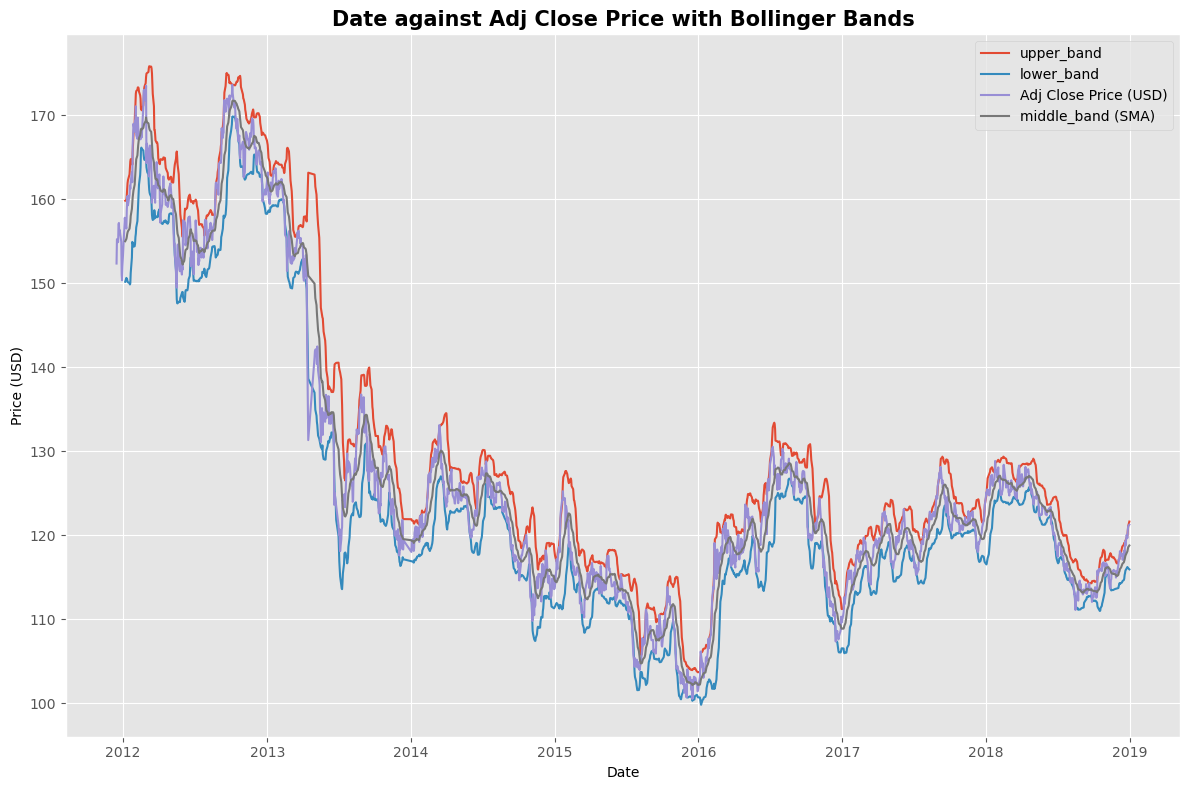

In [78]:
# Visualize Bollinger Bands using line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y=upper_band, data=df, label='upper_band')
sns.lineplot(x='Date', y=lower_band, data=df, label='lower_band')
sns.lineplot(x='Date', y='Adj Close', data=df, label='Adj Close Price (USD)')
sns.lineplot(x='Date', y=SMA, data=df, label='middle_band (SMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Date against Adj Close Price with Bollinger Bands', fontsize=15, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### 3.3.5 Average Directional Index (ADX)

In [79]:
#Function to calculate Average Directional Index (ADX)
#Time period is 14 days by default

def calculate_adx(high, low, close, period=14):
    # Calculate True Range (TR)
    high_low = high - low
    high_prevClose = abs(high - close.shift(1))
    low_prevClose = abs(low - close.shift(1))
    TR = pd.concat([high_low, high_prevClose, low_prevClose], axis=1).max(axis=1)

    # Calculate +DI and -DI
    up_move = high.diff()
    down_move = -low.diff()
    pos_DM = ((up_move > down_move) & (up_move > 0)) * up_move
    neg_DM = ((down_move > up_move) & (down_move > 0)) * down_move

    # Calculate ATR, +DI, and -DI over the specified period
    ATR = TR.rolling(window=period).mean()
    pos_DI = (pos_DM.rolling(window=period).mean() / ATR ) * 100
    neg_DI = (neg_DM.rolling(window=period).mean() / ATR ) * 100

    # Calculate Directional Movement Index (DX)
    DX = (abs(pos_DI - neg_DI) / (pos_DI + neg_DI)) * 100

    # Calculate ADX as a smoothed average of DX
    ADX = DX.rolling(window=period).mean()

    return high_low, ADX

high_low, ADX = calculate_adx(df['High'], df['Low'], df['Adj Close'])
ADX

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1713    36.611455
1714    37.498937
1715    38.793762
1716    39.518652
1717    41.439205
Length: 1718, dtype: float64

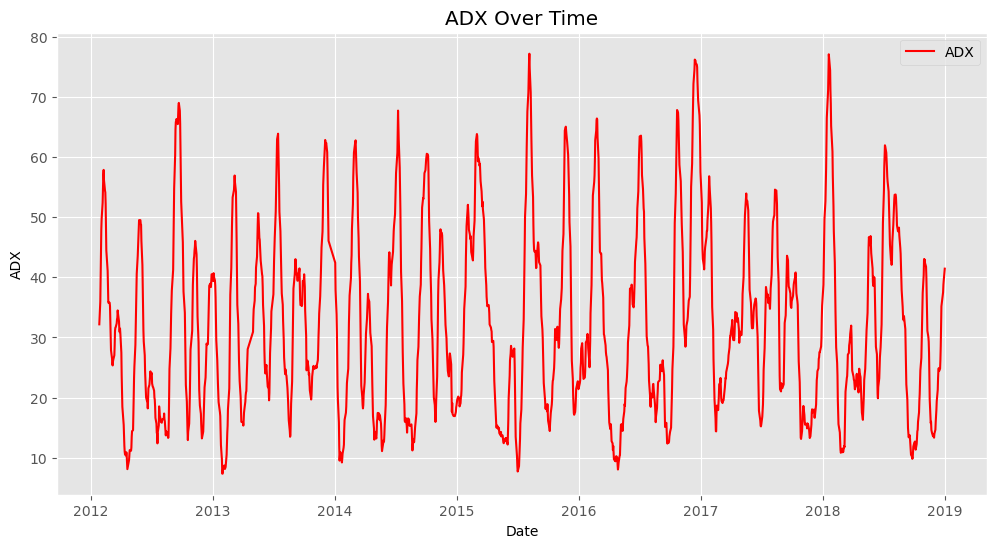

In [80]:
# Visualise ADX using line chart
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Date']), ADX, label='ADX', color='red')
plt.xlabel('Date')
plt.ylabel('ADX')
plt.xticks(fontsize = 10)
plt.title('ADX Over Time')
plt.legend()
plt.show()

## 3.4 Data Concatenation

In [81]:
warnings.filterwarnings('ignore')

#Concatenate Columns
df_final = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose',
'OF_Price', 'OF_Open', 'OF_High', 'OF_Low',
'SF_Price', 'SF_Open', 'SF_High', 'SF_Low',
'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low',
'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close',
'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose',
'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose',
'OF_Trend', 'PLT_Trend', 'USDI_Trend']]

df_final['RHO_Price'] = rho
df_final['SMA'] = sma
df_final['MACD'] = MACD
df_final['Signal'] = signal
df_final['RSI'] = rsi
df_final['High_Low'] = high_low
df_final['ADX'] = ADX
df_final['Upper_Band'] = upper_band
df_final['Lower_Band'] = lower_band

#Parsing date
df_final['Date'] = pd.to_datetime(df_final['Date'])

df_final.set_index('Date', inplace=True)

df_final

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              EG_open    EG_high     EG_low   EG_close  EG_Ajclose  ...  \
Date                                                                ...   
2011-12-15  74.550003  76.150002  72.150002  72.900002   70.431755  ...   
2011-12-16  73.599998  75.099998  73.349998  74.900002   72.364037  ...   
2011-12-19  69.099998  69.800003  64.199997  64.699997   62.509384  ...   
2011-12-20  66.449997  68.099998  66.000000  67.000000   64.731514  ...   
2011-12-21  67.099998  69.400002  66.900002  68.500000   66.180725  ...   
...               ...        ...        ...        ...         ...  ...   
2018-12-24   2.950000   3.050000   2.900000   2.950000    2.950000  ...   
2018-12-26   3.000000   3.050000   2.900000   3.000000    3.000000  ...   
2018-12-27   2.950000   3.000000   2.900000   2.950000    2.950000  ...   
2018-12-28   2.850000   2.950000   2.850000   2.900000    2.900000  ...   
2018-12-31   2.770000   2.950000   2.730000   2.880000    2.880000  ...   

            USDI_Trend  RHO_Price         SMA      MACD    Signal        RSI  \
Date                                                                           
2011-12-15           0     1425.0         NaN       NaN       NaN        NaN   
2011-12-16           0     1400.0         NaN       NaN       NaN        NaN   
2011-12-19           0     1400.0         NaN       NaN       NaN        NaN   
2011-12-20           1     1400.0         NaN       NaN       NaN        NaN   
2011-12-21           1     1400.0         NaN       NaN       NaN        NaN   
...                ...        ...         ...       ...       ...        ...   
2018-12-24           0     2480.0  117.852667  0.889990  0.682093  73.529415   
2018-12-26           1     2480.0  118.069333  0.946924  0.735059  68.035556   
2018-12-27           0     2470.0  118.299333  1.053331  0.798713  68.729672   
2018-12-28           0     2460.0  118.560667  1.163783  0.871727  70.247973   
2018-12-31           0     2460.0  118.771333  1.252214  0.947825  67.713059   

            High_Low        ADX  Upper_Band  Lower_Band  
Date                                                     
2011-12-15  3.239990        NaN         NaN         NaN  
2011-12-16  1.470001        NaN         NaN         NaN  
2011-12-19  1.500000        NaN         NaN         NaN  
2011-12-20  0.849991        NaN         NaN         NaN  
2011-12-21  1.399994        NaN         NaN         NaN  
...              ...        ...         ...         ...  
2018-12-24  0.569999  36.611455  119.680067  116.025267  
2018-12-26  1.430000  37.498937  119.933958  116.204709  
2018-12-27  0.760003  38.793762  120.485491  116.113176  
2018-12-28  0.360001  39.518652  121.066676  116.054658  
2018-12-31  0.430000  41.439205  121.616156  115.926511  

[1718 rows x 53 columns]

In [82]:
#Check starting from which row consists of null value 
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
df_final.isna().any(axis=1)

Date
2011-12-15     True
2011-12-16     True
2011-12-19     True
2011-12-20     True
2011-12-21     True
              ...  
2018-12-24    False
2018-12-26    False
2018-12-27    False
2018-12-28    False
2018-12-31    False
Length: 1718, dtype: bool

In [83]:
#drop rows with null value
df_final_cleaned = df_final.dropna()
df_final_cleaned

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   
2012-02-07  167.380005  170.089996  167.149994  169.699997  169.699997   
2012-02-08  169.259995  169.960007  167.500000  168.500000  168.500000   
2012-02-09  170.009995  170.369995  167.669998  168.020004  168.020004   
2012-02-10  166.490005  167.639999  166.330002  167.139999  167.139999   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              EG_open    EG_high     EG_low   EG_close  EG_Ajclose  ...  \
Date                                                                ...   
2012-02-06  72.849998  73.900002  72.400002  72.900002   70.882599  ...   
2012-02-07  73.400002  73.699997  71.599998  72.449997   70.445045  ...   
2012-02-08  72.650002  73.199997  70.199997  70.300003   68.354538  ...   
2012-02-09  71.199997  71.500000  69.250000  69.400002   67.479446  ...   
2012-02-10  67.900002  68.199997  67.199997  67.349998   65.486183  ...   
...               ...        ...        ...        ...         ...  ...   
2018-12-24   2.950000   3.050000   2.900000   2.950000    2.950000  ...   
2018-12-26   3.000000   3.050000   2.900000   3.000000    3.000000  ...   
2018-12-27   2.950000   3.000000   2.900000   2.950000    2.950000  ...   
2018-12-28   2.850000   2.950000   2.850000   2.900000    2.900000  ...   
2018-12-31   2.770000   2.950000   2.730000   2.880000    2.880000  ...   

            USDI_Trend  RHO_Price         SMA      MACD    Signal        RSI  \
Date                                                                           
2012-02-06           1     1475.0  165.198666  2.724443  2.641891  65.653704   
2012-02-07           0     1500.0  165.894667  2.754381  2.667095  72.577806   
2012-02-08           1     1500.0  166.428000  2.655845  2.664634  67.330988   
2012-02-09           0     1500.0  166.856000  2.511947  2.631843  64.292047   
2012-02-10           1     1525.0  167.250666  2.303734  2.562404  62.891961   
...                ...        ...         ...       ...       ...        ...   
2018-12-24           0     2480.0  117.852667  0.889990  0.682093  73.529415   
2018-12-26           1     2480.0  118.069333  0.946924  0.735059  68.035556   
2018-12-27           0     2470.0  118.299333  1.053331  0.798713  68.729672   
2018-12-28           0     2460.0  118.560667  1.163783  0.871727  70.247973   
2018-12-31           0     2460.0  118.771333  1.252214  0.947825  67.713059   

            High_Low        ADX  Upper_Band  Lower_Band  
Date                                                     
2012-02-06  1.069992  52.413088  173.018365  157.378968  
2012-02-07  2.940002  54.628683  173.296304  158.493029  
2012-02-08  2.460007  57.094966  173.297467  159.558533  
2012-02-09  2.699997  57.871276  173.217507  160.494493  
2012-02-10  1.309997  56.162133  172.795817  161.705515  
...              ...        ...         ...         ...  
2018-12-24  0.569999  36.611455  119.680067  116.025267  
2018-12-26  1.430000  37.498937  119.933958  116.204709  
2018-12-27  0.760003  38.793762  120.485491  116.113176  
2018-12-28  0.360001  39.518652  121.066676  116.054658  
2018-12-31  0.430000  41.439205  121.616156  115.926511  

[1685 rows x 53 columns]

## 3.5 Data Normalisation

In [84]:
#Normalisation using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

df_final_cleaned_features = df_final_cleaned.drop(columns = ['Adj Close'])
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(df_final_cleaned_features), columns=df_final_cleaned_features.columns, index = df_final_cleaned.index)
scaled_features

Open      High       Low     Close   EG_open   EG_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.912050  0.905076  0.909149   
2012-02-07  0.919480  0.945539  0.920622  0.946519  0.912179  0.906590   
2012-02-08  0.945490  0.943760  0.925437  0.930105  0.902493  0.900192   
2012-02-09  0.955866  0.949370  0.927775  0.923540  0.883766  0.878439   
2012-02-10  0.907167  0.912014  0.909341  0.911503  0.841147  0.836212   
...              ...       ...       ...       ...       ...       ...   
2018-12-24  0.258024  0.262042  0.266061  0.266995  0.002325  0.002559   
2018-12-26  0.272551  0.273810  0.266061  0.262071  0.002970  0.002559   
2018-12-27  0.271859  0.272441  0.273903  0.274518  0.002325  0.001919   
2018-12-28  0.275042  0.274904  0.281882  0.281220  0.001033  0.001280   
2018-12-31  0.277532  0.277367  0.283395  0.283819  0.000000  0.001280   

              EG_low  EG_close  EG_Ajclose  OF_Price  ...  USDI_Trend  \
Date                                                  ...               
2012-02-06  0.926833  0.910390    0.905362  0.895363  ...         1.0   
2012-02-07  0.916190  0.904545    0.899543  0.898414  ...         0.0   
2012-02-08  0.897565  0.876623    0.871744  0.908277  ...         1.0   
2012-02-09  0.884927  0.864935    0.860107  0.922412  ...         0.0   
2012-02-10  0.857656  0.838312    0.833600  0.909396  ...         1.0   
...              ...       ...         ...       ...  ...         ...   
2018-12-24  0.002262  0.001948    0.001995  0.229713  ...         0.0   
2018-12-26  0.002262  0.002597    0.002660  0.270388  ...         1.0   
2018-12-27  0.002262  0.001948    0.001995  0.246899  ...         0.0   
2018-12-28  0.001596  0.001299    0.001330  0.247305  ...         0.0   
2018-12-31  0.000000  0.001039    0.001064  0.263575  ...         0.0   

            RHO_Price       SMA      MACD    Signal       RSI  High_Low  \
Date                                                                      
2012-02-06   0.430380  0.906189  0.893394  0.911893  0.687173  0.091684   
2012-02-07   0.443038  0.916193  0.896986  0.915193  0.765069  0.291045   
2012-02-08   0.443038  0.923859  0.885164  0.914871  0.706042  0.239873   
2012-02-09   0.443038  0.930011  0.867900  0.910578  0.671854  0.265458   
2012-02-10   0.455696  0.935684  0.842920  0.901486  0.656103  0.117271   
...               ...       ...       ...       ...       ...       ...   
2018-12-24   0.939241  0.225663  0.673309  0.655308  0.775775  0.038380   
2018-12-26   0.939241  0.228778  0.680140  0.662243  0.713969  0.130064   
2018-12-27   0.934177  0.232083  0.692906  0.670576  0.721777  0.058636   
2018-12-28   0.929114  0.235840  0.706157  0.680136  0.738858  0.015992   
2018-12-31   0.929114  0.238868  0.716766  0.690099  0.710340  0.023454   

                 ADX  Upper_Band  Lower_Band  
Date                                          
2012-02-06  0.645298    0.961240    0.821988  
2012-02-07  0.677008    0.965092    0.837893  
2012-02-08  0.712305    0.965108    0.853105  
2012-02-09  0.723416    0.964000    0.866467  
2012-02-10  0.698955    0.958155    0.883757  
...              ...         ...         ...  
2018-12-24  0.419144    0.221905    0.231591  
2018-12-26  0.431846    0.225424    0.234153  
2018-12-27  0.450378    0.233069    0.232846  
2018-12-28  0.460752    0.241125    0.232010  
2018-12-31  0.488239    0.248741    0.230181  

[1685 rows x 52 columns]

# 4.0 Modelling

## 4.1 Train Test Split

In [85]:
#Shift target variable 'Adj Close'
df_final_cleaned_target = df_final_cleaned['Adj Close']
df_final_cleaned_target = df_final_cleaned_target.shift(-1)
df_final_cleaned_target

Date
2012-02-06    169.699997
2012-02-07    168.500000
2012-02-08    168.020004
2012-02-09    167.139999
2012-02-10    167.509995
                 ...    
2018-12-24    119.660004
2018-12-26    120.570000
2018-12-27    121.059998
2018-12-28    121.250000
2018-12-31           NaN
Name: Adj Close, Length: 1685, dtype: float64

In [86]:
#Discard last row of target
df_final_cleaned_target = df_final_cleaned_target[:-1]
df_final_cleaned_target

Date
2012-02-06    169.699997
2012-02-07    168.500000
2012-02-08    168.020004
2012-02-09    167.139999
2012-02-10    167.509995
                 ...    
2018-12-21    120.019997
2018-12-24    119.660004
2018-12-26    120.570000
2018-12-27    121.059998
2018-12-28    121.250000
Name: Adj Close, Length: 1684, dtype: float64

In [87]:
#Discard last row for features
scaled_features = scaled_features[:-1]
scaled_features

Open      High       Low     Close   EG_open   EG_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.912050  0.905076  0.909149   
2012-02-07  0.919480  0.945539  0.920622  0.946519  0.912179  0.906590   
2012-02-08  0.945490  0.943760  0.925437  0.930105  0.902493  0.900192   
2012-02-09  0.955866  0.949370  0.927775  0.923540  0.883766  0.878439   
2012-02-10  0.907167  0.912014  0.909341  0.911503  0.841147  0.836212   
...              ...       ...       ...       ...       ...       ...   
2018-12-21  0.252767  0.249863  0.252304  0.249214  0.003616  0.003839   
2018-12-24  0.258024  0.262042  0.266061  0.266995  0.002325  0.002559   
2018-12-26  0.272551  0.273810  0.266061  0.262071  0.002970  0.002559   
2018-12-27  0.271859  0.272441  0.273903  0.274518  0.002325  0.001919   
2018-12-28  0.275042  0.274904  0.281882  0.281220  0.001033  0.001280   

              EG_low  EG_close  EG_Ajclose  OF_Price  ...  USDI_Trend  \
Date                                                  ...               
2012-02-06  0.926833  0.910390    0.905362  0.895363  ...         1.0   
2012-02-07  0.916190  0.904545    0.899543  0.898414  ...         0.0   
2012-02-08  0.897565  0.876623    0.871744  0.908277  ...         1.0   
2012-02-09  0.884927  0.864935    0.860107  0.922412  ...         0.0   
2012-02-10  0.857656  0.838312    0.833600  0.909396  ...         1.0   
...              ...       ...         ...       ...  ...         ...   
2018-12-21  0.002262  0.002597    0.002660  0.263779  ...         1.0   
2018-12-24  0.002262  0.001948    0.001995  0.229713  ...         0.0   
2018-12-26  0.002262  0.002597    0.002660  0.270388  ...         1.0   
2018-12-27  0.002262  0.001948    0.001995  0.246899  ...         0.0   
2018-12-28  0.001596  0.001299    0.001330  0.247305  ...         0.0   

            RHO_Price       SMA      MACD    Signal       RSI  High_Low  \
Date                                                                      
2012-02-06   0.430380  0.906189  0.893394  0.911893  0.687173  0.091684   
2012-02-07   0.443038  0.916193  0.896986  0.915193  0.765069  0.291045   
2012-02-08   0.443038  0.923859  0.885164  0.914871  0.706042  0.239873   
2012-02-09   0.443038  0.930011  0.867900  0.910578  0.671854  0.265458   
2012-02-10   0.455696  0.935684  0.842920  0.901486  0.656103  0.117271   
...               ...       ...       ...       ...       ...       ...   
2018-12-21   0.939241  0.221370  0.658641  0.648503  0.710148  0.050107   
2018-12-24   0.939241  0.225663  0.673309  0.655308  0.775775  0.038380   
2018-12-26   0.939241  0.228778  0.680140  0.662243  0.713969  0.130064   
2018-12-27   0.934177  0.232083  0.692906  0.670576  0.721777  0.058636   
2018-12-28   0.929114  0.235840  0.706157  0.680136  0.738858  0.015992   

                 ADX  Upper_Band  Lower_Band  
Date                                          
2012-02-06  0.645298    0.961240    0.821988  
2012-02-07  0.677008    0.965092    0.837893  
2012-02-08  0.712305    0.965108    0.853105  
2012-02-09  0.723416    0.964000    0.866467  
2012-02-10  0.698955    0.958155    0.883757  
...              ...         ...         ...  
2018-12-21  0.398650    0.217009    0.228105  
2018-12-24  0.419144    0.221905    0.231591  
2018-12-26  0.431846    0.225424    0.234153  
2018-12-27  0.450378    0.233069    0.232846  
2018-12-28  0.460752    0.241125    0.232010  

[1684 rows x 52 columns]

In [88]:
#Perform train split
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df_final_cleaned_target, test_size=test_size, shuffle=False)

In [89]:
X_train

Open      High       Low     Close   EG_open   EG_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.912050  0.905076  0.909149   
2012-02-07  0.919480  0.945539  0.920622  0.946519  0.912179  0.906590   
2012-02-08  0.945490  0.943760  0.925437  0.930105  0.902493  0.900192   
2012-02-09  0.955866  0.949370  0.927775  0.923540  0.883766  0.878439   
2012-02-10  0.907167  0.912014  0.909341  0.911503  0.841147  0.836212   
...              ...       ...       ...       ...       ...       ...   
2017-08-14  0.291367  0.290777  0.295089  0.292983  0.094666  0.092770   
2017-08-16  0.273105  0.288314  0.281057  0.292299  0.084980  0.086372   
2017-08-17  0.295656  0.295840  0.296189  0.300780  0.088854  0.087652   
2017-08-18  0.310598  0.308566  0.299491  0.298181  0.087563  0.086372   
2017-08-21  0.299115  0.300903  0.306369  0.304473  0.087563  0.087012   

              EG_low  EG_close  EG_Ajclose  OF_Price  ...  USDI_Trend  \
Date                                                  ...               
2012-02-06  0.926833  0.910390    0.905362  0.895363  ...         1.0   
2012-02-07  0.916190  0.904545    0.899543  0.898414  ...         0.0   
2012-02-08  0.897565  0.876623    0.871744  0.908277  ...         1.0   
2012-02-09  0.884927  0.864935    0.860107  0.922412  ...         0.0   
2012-02-10  0.857656  0.838312    0.833600  0.909396  ...         1.0   
...              ...       ...         ...       ...  ...         ...   
2017-08-14  0.090063  0.087662    0.089761  0.232357  ...         1.0   
2017-08-16  0.085406  0.086364    0.088432  0.227679  ...         0.0   
2017-08-17  0.086737  0.085065    0.087102  0.235408  ...         1.0   
2017-08-18  0.087402  0.087013    0.089097  0.252593  ...         0.0   
2017-08-21  0.088732  0.087662    0.089761  0.241814  ...         0.0   

            RHO_Price       SMA      MACD    Signal       RSI  High_Low  \
Date                                                                      
2012-02-06   0.430380  0.906189  0.893394  0.911893  0.687173  0.091684   
2012-02-07   0.443038  0.916193  0.896986  0.915193  0.765069  0.291045   
2012-02-08   0.443038  0.923859  0.885164  0.914871  0.706042  0.239873   
2012-02-09   0.443038  0.930011  0.867900  0.910578  0.671854  0.265458   
2012-02-10   0.455696  0.935684  0.842920  0.901486  0.656103  0.117271   
...               ...       ...       ...       ...       ...       ...   
2017-08-14   0.210127  0.265075  0.678930  0.655212  0.690766  0.037313   
2017-08-16   0.210127  0.267902  0.680179  0.662174  0.722995  0.126865   
2017-08-17   0.215190  0.270403  0.685795  0.668970  0.707081  0.068230   
2017-08-18   0.220253  0.272808  0.687018  0.674674  0.697087  0.141791   
2017-08-21   0.225316  0.274792  0.691006  0.680107  0.673919  0.028785   

                 ADX  Upper_Band  Lower_Band  
Date                                          
2012-02-06  0.645298    0.961240    0.821988  
2012-02-07  0.677008    0.965092    0.837893  
2012-02-08  0.712305    0.965108    0.853105  
2012-02-09  0.723416    0.964000    0.866467  
2012-02-10  0.698955    0.958155    0.883757  
...              ...         ...         ...  
2017-08-14  0.674615    0.264534    0.265977  
2017-08-16  0.641340    0.265603    0.270492  
2017-08-17  0.578745    0.269528    0.271418  
2017-08-18  0.516063    0.271829    0.273826  
2017-08-21  0.454003    0.275675    0.273805  

[1347 rows x 52 columns]

In [90]:
X_test

Open      High       Low     Close   EG_open   EG_high  \
Date                                                                     
2017-08-22  0.299391  0.295156  0.297427  0.296950  0.087563  0.086372   
2017-08-23  0.299668  0.296935  0.303756  0.303242  0.087563  0.086372   
2017-08-24  0.297039  0.296251  0.301279  0.298044  0.087563  0.087652   
2017-08-25  0.302297  0.301450  0.289723  0.304199  0.090146  0.088932   
2017-08-28  0.310044  0.324850  0.317788  0.330871  0.092729  0.095969   
...              ...       ...       ...       ...       ...       ...   
2018-12-21  0.252767  0.249863  0.252304  0.249214  0.003616  0.003839   
2018-12-24  0.258024  0.262042  0.266061  0.266995  0.002325  0.002559   
2018-12-26  0.272551  0.273810  0.266061  0.262071  0.002970  0.002559   
2018-12-27  0.271859  0.272441  0.273903  0.274518  0.002325  0.001919   
2018-12-28  0.275042  0.274904  0.281882  0.281220  0.001033  0.001280   

              EG_low  EG_close  EG_Ajclose  OF_Price  ...  USDI_Trend  \
Date                                                  ...               
2017-08-22  0.089397  0.086364    0.088432  0.243950  ...         1.0   
2017-08-23  0.088732  0.087662    0.089761  0.251068  ...         0.0   
2017-08-24  0.089397  0.088961    0.091091  0.245678  ...         1.0   
2017-08-25  0.089397  0.090909    0.093086  0.249441  ...         0.0   
2017-08-28  0.095384  0.098052    0.100400  0.244153  ...         0.0   
...              ...       ...         ...       ...  ...         ...   
2018-12-21  0.002262  0.002597    0.002660  0.263779  ...         1.0   
2018-12-24  0.002262  0.001948    0.001995  0.229713  ...         0.0   
2018-12-26  0.002262  0.002597    0.002660  0.270388  ...         1.0   
2018-12-27  0.002262  0.001948    0.001995  0.246899  ...         0.0   
2018-12-28  0.001596  0.001299    0.001330  0.247305  ...         0.0   

            RHO_Price       SMA      MACD    Signal       RSI  High_Low  \
Date                                                                      
2017-08-22   0.225316  0.276191  0.687448  0.683677  0.618562  0.053305   
2017-08-23   0.230380  0.278126  0.687685  0.686584  0.653100  0.018124   
2017-08-24   0.235443  0.279938  0.682853  0.687856  0.641834  0.031983   
2017-08-25   0.240506  0.281998  0.682049  0.688697  0.655214  0.162047   
2017-08-28   0.240506  0.286827  0.698765  0.693019  0.812665  0.126866   
...               ...       ...       ...       ...       ...       ...   
2018-12-21   0.939241  0.221370  0.658641  0.648503  0.710148  0.050107   
2018-12-24   0.939241  0.225663  0.673309  0.655308  0.775775  0.038380   
2018-12-26   0.939241  0.228778  0.680140  0.662243  0.713969  0.130064   
2018-12-27   0.934177  0.232083  0.692906  0.670576  0.721777  0.058636   
2018-12-28   0.929114  0.235840  0.706157  0.680136  0.738858  0.015992   

                 ADX  Upper_Band  Lower_Band  
Date                                          
2017-08-22  0.379204    0.277428    0.274779  
2017-08-23  0.304300    0.280061    0.275912  
2017-08-24  0.232997    0.281104    0.278436  
2017-08-25  0.201303    0.282961    0.280616  
2017-08-28  0.195915    0.289545    0.283428  
...              ...         ...         ...  
2018-12-21  0.398650    0.217009    0.228105  
2018-12-24  0.419144    0.221905    0.231591  
2018-12-26  0.431846    0.225424    0.234153  
2018-12-27  0.450378    0.233069    0.232846  
2018-12-28  0.460752    0.241125    0.232010  

[337 rows x 52 columns]

In [91]:
y_train

Date
2012-02-06    169.699997
2012-02-07    168.500000
2012-02-08    168.020004
2012-02-09    167.139999
2012-02-10    167.509995
                 ...    
2017-08-14    121.870003
2017-08-16    122.489998
2017-08-17    122.300003
2017-08-18    122.760002
2017-08-21    122.209999
Name: Adj Close, Length: 1347, dtype: float64

In [92]:
y_test

Date
2017-08-22    122.669998
2017-08-23    122.290001
2017-08-24    122.739998
2017-08-25    124.690002
2017-08-28    124.419998
                 ...    
2018-12-21    120.019997
2018-12-24    119.660004
2018-12-26    120.570000
2018-12-27    121.059998
2018-12-28    121.250000
Name: Adj Close, Length: 337, dtype: float64

## 4.2 Evaluation Metrics

### 4.2.1 Mean Absolute Percentage Error (MAPE)

In [93]:
# Function for calculating MAPE
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

### 4.2.2 R-Squared (Coefficient of Determination)

-- No code available for this section --

### 4.2.3 Root Mean Square Error (RMSE)

-- No code available for this section --

### 4.2.4 Mean Absolute Error (MAE)

-- No code available for this section --

## 4.3 Decision Tree Regressor Modelling

### 4.3.1 Algorithm and Assumptions

-- No code available for this section --

### 4.3.2 Model Building

In [94]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

dtr_pred = dtr.predict(X_test)
dtr_pred

array([122.300003, 122.239998, 121.870003, 121.919998, 124.389999,
       123.93    , 122.150002, 124.5     , 128.839996, 127.580002,
       127.580002, 127.580002, 127.580002, 124.010002, 127.580002,
       126.089996, 126.089996, 126.089996, 122.150002, 122.150002,
       125.809998, 122.239998, 122.239998, 124.389999, 120.650002,
       121.650002, 121.650002, 121.650002, 121.610001, 121.650002,
       121.610001, 121.650002, 121.650002, 121.650002, 122.239998,
       120.650002, 121.129997, 121.129997, 121.650002, 121.650002,
       121.650002, 121.650002, 121.650002, 121.650002, 121.650002,
       121.610001, 121.610001, 121.650002, 121.610001, 121.650002,
       121.650002, 121.610001, 121.650002, 121.650002, 121.650002,
       121.650002, 121.650002, 121.650002, 121.650002, 121.650002,
       121.650002, 122.239998, 121.650002, 121.650002, 122.239998,
       121.650002, 120.650002, 120.650002, 121.650002, 118.639999,
       118.639999, 118.639999, 119.550003, 119.139999, 117.07 

### 4.3.3 Model Evaluation

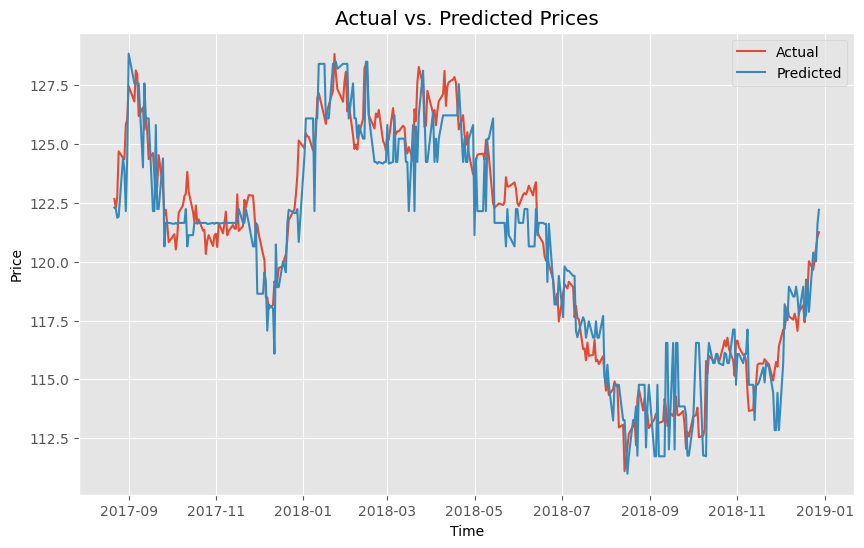

In [95]:
#Plot graph for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, dtr_pred , label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show() 

In [96]:
# Evaluate model : MAPE : Lower MAPE values indicates that better performance
dtr_MAPE= MAPE(y_test,dtr_pred)
dtr_MAPE

0.9262563890487826

In [97]:
# Evalute model: R squared : Range from 0 to 1, the nearer to 1 the better
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_r2

0.9046862155796027

In [98]:
#Evaluate model: RMSE
dtr_RMSE = np.sqrt(mean_squared_error(y_test, dtr_pred))
dtr_RMSE

1.4426796864295335

In [99]:
#Evaluate model: MAE : reflect the difference between predicted and actual price
dtr_MAE = mean_absolute_error(y_test, dtr_pred)
dtr_MAE

1.1180414688427294

### 4.3.4 Hyperparameter Tuning

In [100]:
# Hyper parameters random range intialization for tuning using Gridsearch to find the best parameters for our decision tree model.
dtr_grid = {"splitter":["best","random"],
            "max_depth" : [5,10,15,20,25,30],
            "max_features":['auto','log2','sqrt',None]
           }

grid_search_dtr = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42), param_grid = dtr_grid, cv = 5, scoring='neg_mean_squared_error')

grid_search_dtr.fit(X_train,y_train)
grid_search_dtr.best_params_

{'max_depth': 20, 'max_features': 'auto', 'splitter': 'random'}

In [101]:
# Run model agian with tuned parameter
grid_search_dtr_pred = grid_search_dtr.predict(X_test)
grid_search_dtr_pred

array([122.82    , 122.82    , 122.82    , 121.959999, 122.209999,
       122.209999, 122.209999, 128.839996, 128.839996, 127.57    ,
       128.199997, 130.289993, 130.289993, 127.639999, 126.470001,
       125.059998, 126.470001, 128.839996, 122.209999, 122.209999,
       122.209999, 122.209999, 122.209999, 122.209999, 122.209999,
       122.239998, 122.239998, 121.199997, 120.790001, 120.790001,
       119.870003, 119.699997, 121.199997, 122.239998, 122.239998,
       122.209999, 122.209999, 122.209999, 121.559998, 122.209999,
       122.239998, 122.209999, 122.489998, 122.209999, 122.209999,
       119.870003, 122.209999, 122.209999, 119.870003, 120.790001,
       122.209999, 120.650002, 122.209999, 120.25    , 121.199997,
       121.199997, 121.199997, 121.410004, 120.540001, 121.199997,
       121.410004, 122.239998, 121.559998, 122.209999, 122.239998,
       122.239998, 122.209999, 122.209999, 121.199997, 122.209999,
       121.199997, 120.25    , 120.769997, 120.769997, 118.019

### 4.3.5 Model Re-evaluation

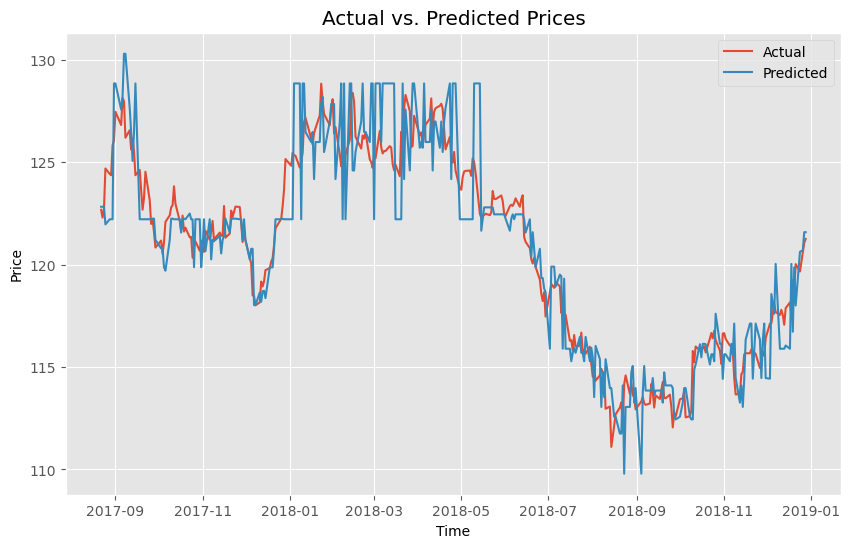

In [102]:
# Plot Again
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, grid_search_dtr_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [144]:
# Evaluate model : MAPE : Lower MAPE values indicates that better performance
grid_search_dtr_MAPE= MAPE(y_test,grid_search_dtr_pred)
grid_search_dtr_MAPE

1.0782317114292086

In [145]:
# Evalute model: R squared : Range from 0 to 1, the nearer to 1 the better
grid_search_dtr_r2 = r2_score(y_test, grid_search_dtr_pred)
grid_search_dtr_r2

0.8613266400630751

In [146]:
#Evaluate model: RMSE
grid_search_dtr_RMSE = np.sqrt(mean_squared_error(y_test, grid_search_dtr_pred))
grid_search_dtr_RMSE

1.7401575862368657

In [147]:
#Evaluate model: MAE : reflect the difference between predicted and actual price
grid_search_dtr_MAE = mean_absolute_error(y_test, grid_search_dtr_pred)
grid_search_dtr_MAE

1.31275916023739

## 4.4 Support Vector Regression

### 4.4.1 Algorithm and Assumptions

-- No code available for this section --

### 4.4.2 Model Building

In [107]:
#Support Vector Regression
svr = SVR(kernel = 'linear', C = 1.0, epsilon = 0.1)
svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)
svr_pred

array([121.60960788, 122.27756121, 121.78145575, 121.85723849,
       123.86447244, 124.5158838 , 123.8586117 , 124.81424868,
       125.19155834, 126.29076696, 125.94597056, 127.14803731,
       126.97849259, 125.56696155, 125.52922175, 125.17027846,
       125.62234647, 125.14360425, 124.11162195, 123.97179269,
       123.43811409, 122.45275462, 122.62829783, 123.33983929,
       122.42000136, 121.46304326, 121.69794071, 120.99204991,
       120.71921732, 120.87673726, 120.48376517, 120.43449583,
       121.46113725, 122.04644734, 122.09490968, 122.41381452,
       123.14239275, 122.30367068, 121.61882256, 121.14140261,
       122.19153037, 121.1557442 , 121.40094692, 121.02396525,
       121.24190825, 120.29946478, 120.12888918, 120.56295293,
       119.92749535, 120.56496213, 120.37172803, 119.64937906,
       120.57665307, 120.24568733, 121.17874221, 121.2172974 ,
       120.47757248, 120.75756923, 120.54999466, 121.22315947,
       121.19930435, 122.03384163, 120.80088186, 121.23

### 4.4.3 Model Evaluation

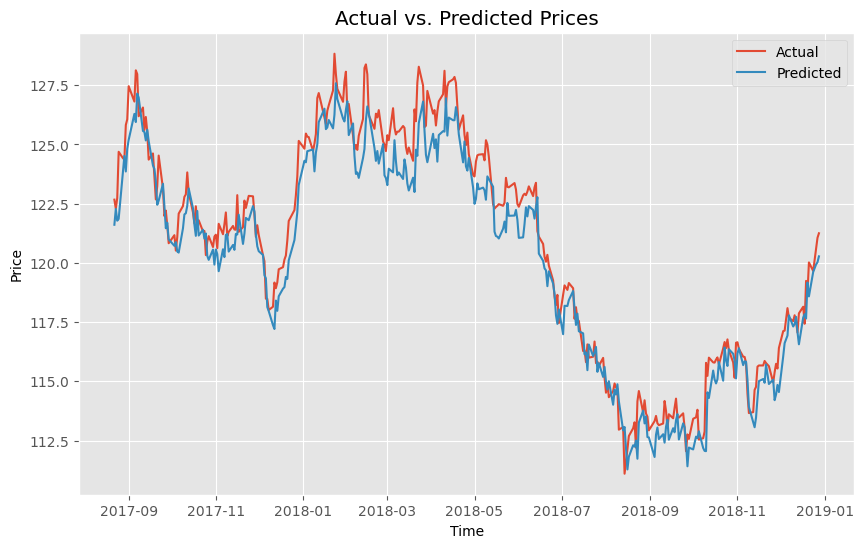

In [108]:
#Plot graph for Support Vector Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, svr_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show() 

In [109]:
# Evaluate model : MAPE : Lower MAPE values indicates that better performance
svr_MAPE= MAPE(y_test,svr_pred)
svr_MAPE

0.7567107391216031

In [110]:
# Evalute model: R squared : Range from 0 to 1, the nearer to 1 the better
svr_r2 = r2_score(y_test, svr_pred)
svr_r2

0.9404143512796259

In [111]:
#Evaluate model: RMSE
svr_RMSE = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_RMSE

1.1406775548623647

In [112]:
#Evaluate model: MAE : reflect the difference between predicted and actual price
svr_MAE = mean_absolute_error(y_test, svr_pred)
svr_MAE

0.9215999532026081

### 4.4.4 Hyperparameter Tuning

In [113]:
svr_grid = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    'kernel': ['linear','rbf'],
}

grid_search_svr = GridSearchCV(estimator=SVR(), param_grid = svr_grid, scoring='neg_mean_squared_error', cv=5)

grid_search_svr.fit(X_train,y_train)
grid_search_svr.best_params_

{'C': 50.0, 'epsilon': 0.5, 'kernel': 'linear'}

In [114]:
# Run model agian with tuned parameter
grid_search_svr_pred = grid_search_svr.predict(X_test)
grid_search_svr_pred

array([122.02469372, 122.52193496, 122.22011178, 122.08867345,
       124.32649126, 124.52742512, 124.2621048 , 125.47074915,
       125.701567  , 127.09405415, 126.45324899, 127.70908059,
       127.54810347, 125.97085019, 126.0557568 , 125.39642889,
       125.91188332, 125.36361785, 124.25451815, 124.3091893 ,
       123.62540195, 122.47408348, 122.90441062, 123.96616351,
       123.03670386, 121.87936448, 122.15638465, 121.40243999,
       120.9069129 , 121.07588081, 120.61180726, 120.87766945,
       121.87866554, 122.36898912, 122.63779345, 122.88637688,
       123.65603304, 122.92091974, 122.24354195, 121.58531188,
       122.4673333 , 121.56435841, 121.64899768, 121.17069442,
       121.35983798, 120.44179265, 120.58699901, 120.92966847,
       120.43397802, 121.06296573, 121.03433499, 120.5325015 ,
       121.37409492, 121.06826759, 121.73537388, 121.93590524,
       121.08630784, 121.28156904, 121.25447107, 121.6096829 ,
       121.45567868, 122.62373484, 121.50323888, 121.58

### 4.5.5 Model Re-evaluation

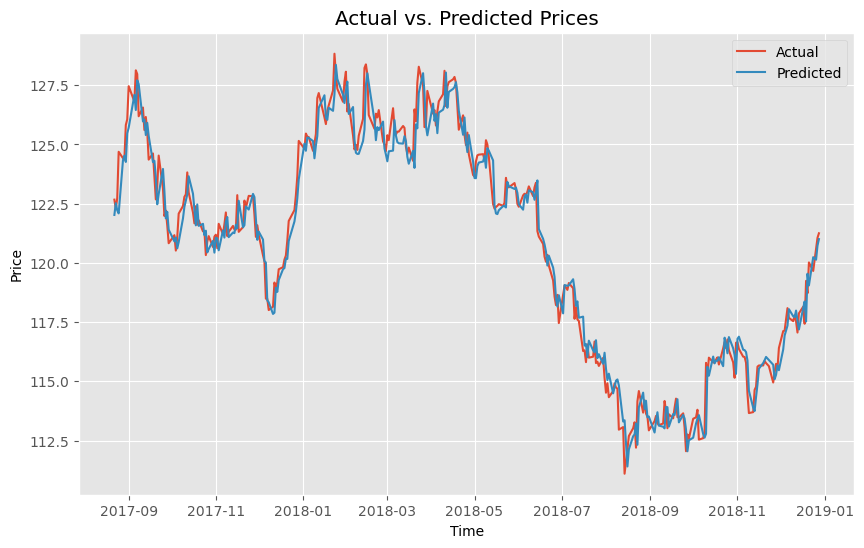

In [115]:
# Plot Again
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, grid_search_svr_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
#MAPE 
grid_search_svr_MAPE= MAPE(y_test,grid_search_svr_pred)
grid_search_svr_MAPE

0.48985084053726313

In [117]:
#R_squared
grid_search_svr_r2 = r2_score(y_test,grid_search_svr_pred)
grid_search_svr_r2

0.9726012292047235

In [118]:
#RMSE
grid_search_svr_RMSE = np.sqrt(mean_squared_error(y_test,grid_search_svr_pred))
grid_search_svr_RMSE

0.7734951584821661

In [119]:
#MAE
grid_search_svr_MAE = mean_absolute_error(y_test, grid_search_svr_pred)
grid_search_svr_MAE

0.5930812165170775

## 4.5 Random Forest Regressor

### 4.5.1 Algorithm and Assumptions

-- No code available for this section --

### 4.5.2 Model Building

In [120]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_pred

array([122.10380067, 122.11059977, 122.00230034, 121.8477002 ,
       123.55970037, 123.81080067, 123.11860052, 124.4368003 ,
       124.88660017, 127.1240999 , 127.05820013, 127.54339906,
       127.35779935, 126.14400006, 127.02520047, 125.6685994 ,
       125.99239954, 125.64289909, 123.59460049, 123.78190037,
       123.96590031, 121.89709975, 121.81929982, 123.17889978,
       122.05779974, 121.64970036, 121.62150022, 121.59900031,
       120.38280071, 120.92820027, 120.42320043, 120.70330035,
       121.58460035, 122.01589966, 122.09689977, 122.26619924,
       123.04049985, 122.48819951, 121.62780042, 121.67090059,
       122.01779999, 121.56840056, 121.20330034, 121.18900026,
       121.10370033, 120.45570009, 120.36990039, 120.86110005,
       120.46630022, 121.06010018, 121.24690018, 120.48300044,
       121.21000006, 121.20020042, 121.68520072, 121.83760049,
       121.3179003 , 121.60780102, 121.17290001, 121.68270056,
       121.63670085, 122.21920029, 121.41500001, 121.65

### 4.5.3 Model Evaluation

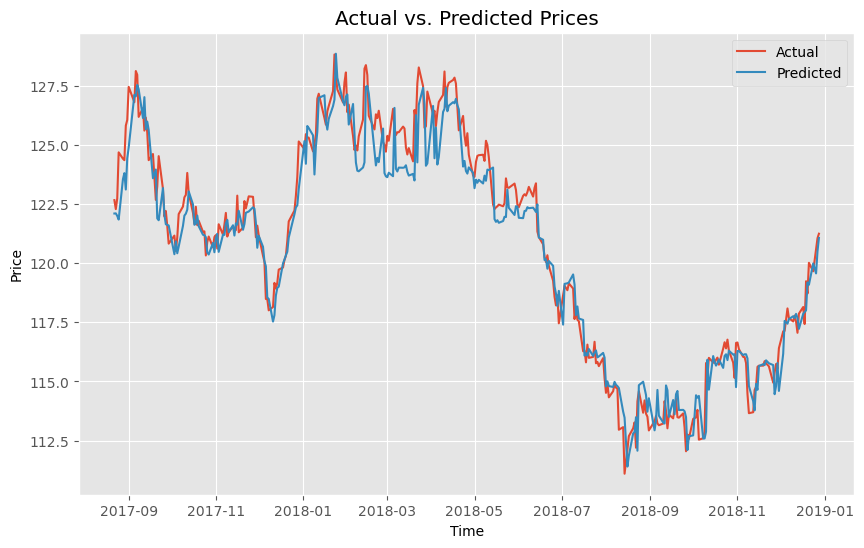

In [121]:
#Plot graph for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines
plt.show() 

In [122]:
# Evaluate model : MAPE : Lower MAPE values indicates that better performance
rf_MAPE= MAPE(y_test,rf_pred)
rf_MAPE

0.635514232710374

In [123]:
# Evalute model: R squared : Range from 0 to 1, the nearer to 1 the better
rf_r2 = r2_score(y_test, rf_pred)
rf_r2

0.9527700428111748

In [124]:
#Evaluate model: RMSE
rf_RMSE = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_RMSE

1.015548890415284

In [125]:
#Evaluate model: MAE : reflect the difference between predicted and actual price
rf_MAE = mean_absolute_error(y_test, rf_pred)
rf_MAE

0.7738189304451047

### 4.5.4 Hyperparameter Tuning

In [126]:
rf_grid = {
    'n_estimators': [10,15,20,50,100],
    'max_depth': [2,3,5,7,10],
    'max_features': ['auto','log2','sqrt'],
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train,y_train)
grid_search_rf.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}

In [127]:
# Run model agian with tuned parameter
grid_search_rf_pred = grid_search_rf.predict(X_test)
grid_search_rf_pred

array([121.4991904 , 121.80045833, 121.96979235, 121.8939367 ,
       122.61163902, 122.96020745, 122.28241141, 123.1513092 ,
       123.1513092 , 124.28799862, 125.16582213, 125.77925436,
       125.4254749 , 124.85734444, 124.6826867 , 123.92036327,
       123.87570054, 123.68659861, 122.64742788, 122.56901774,
       122.32506006, 121.82263821, 121.80268795, 122.45486266,
       121.80493305, 121.44113751, 121.26867082, 121.23796471,
       120.41176054, 120.61796224, 120.6342934 , 120.12309939,
       121.34900406, 121.58432966, 121.38225676, 121.6308559 ,
       121.46809186, 121.47162749, 121.54962017, 121.33924206,
       121.27864287, 121.24576369, 120.94644592, 120.39473438,
       120.01257475, 119.81555582, 119.8465997 , 119.8465997 ,
       119.43135393, 119.8465997 , 120.25301893, 119.8465997 ,
       120.18078932, 119.94659368, 121.21301722, 121.21301722,
       120.53500226, 120.09168936, 120.48094178, 120.78009192,
       120.52286121, 121.38793553, 120.77032786, 120.99

### 4.5.5 Model Re-evaluation

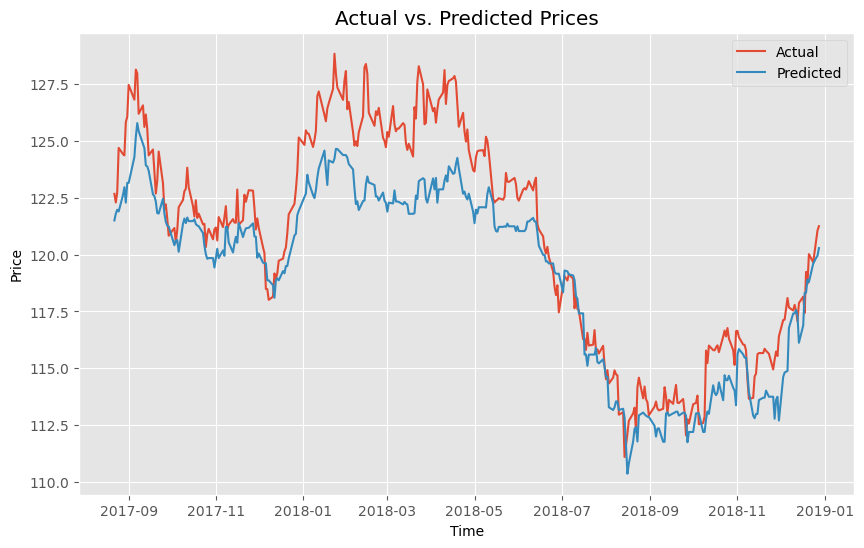

In [128]:
# Plot Again
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, grid_search_rf_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
#MAPE 
grid_search_rf_MAPE= MAPE(y_test,grid_search_rf_pred)
grid_search_rf_MAPE

1.3767147574747123

In [130]:
#R_squared
grid_search_rf_r2 = r2_score(y_test,grid_search_rf_pred)
grid_search_rf_r2

0.8021779855689485

In [131]:
#RMSE
grid_search_rf_RMSE = np.sqrt(mean_squared_error(y_test,grid_search_rf_pred))
grid_search_rf_RMSE

2.078401130853096

In [132]:
#MAE
grid_search_rf_MAE = mean_absolute_error(y_test, grid_search_rf_pred)
grid_search_rf_MAE

1.6889301495482474

# 5.0 Evaluation

## 5.1 Evaluation of Models

In [133]:
# Function for plotting bar chart for evaluation
def evaluation_bar(metrics, metrics_name):
    model_labels = ['Decision Tree Regressor', 'Support Vector Regression (Tuned)', 'Random Forest Regressor']
    colours = ['#C23B23','#F39A27','#EADA92']
    
    plt.figure(figsize=(8, 4))
    bars = plt.barh(model_labels, [np.mean(metric) for metric in metrics])
    
    for i, bar in enumerate(bars):
        bar.set_color(colours[i])
        
    if(metrics_name == 'MAPE'):
        for i, bar in enumerate(bars):
            plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{np.mean(metrics[i]):.2f}%', va='center')
        
        plt.xlabel(f'{metrics_name} (%)')
        plt.title(f'{metrics_name} for Different Models')
    else:
        for i, bar in enumerate(bars):
            plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{np.mean(metrics[i]):.2f}', va='center')
        
        plt.xlabel(f'{metrics_name}')
        plt.title(f'{metrics_name} for Different Models')
    
    plt.tight_layout()
    plt.show()

In [134]:
# Grouping related metrics together

mape_values = [dtr_MAPE, grid_search_svr_MAPE, rf_MAPE]
r2_values = [dtr_r2, grid_search_svr_r2, rf_r2]
rmse_values = [dtr_RMSE, grid_search_svr_RMSE, rf_RMSE]
mae_values = [dtr_MAE, grid_search_svr_MAE, rf_MAE]

### 5.1.1 Mean Absolute Percentage Error (MAPE)

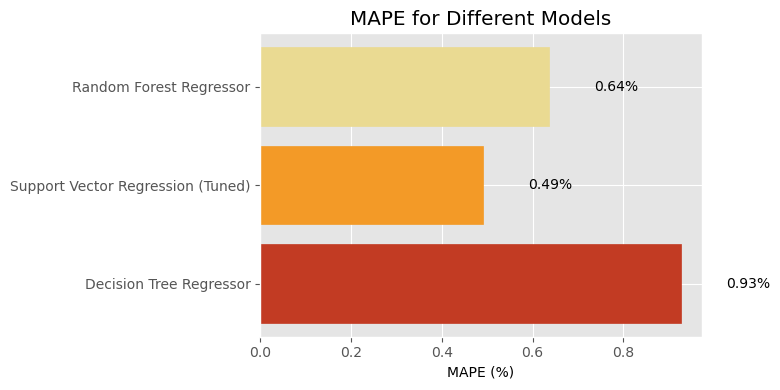

In [135]:
# MAPE
evaluation_bar(mape_values, 'MAPE')

### 5.1.2 R-Squared (Coefficient of Determination)

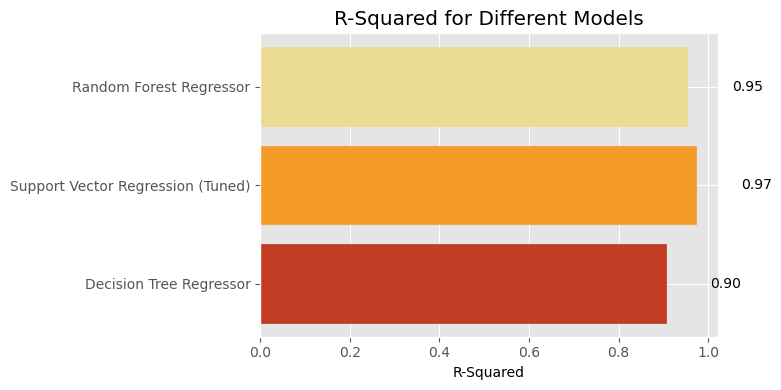

In [136]:
# R-Squared
evaluation_bar(r2_values, 'R-Squared')

### 5.1.3 Root Mean Square Error (RMSE)

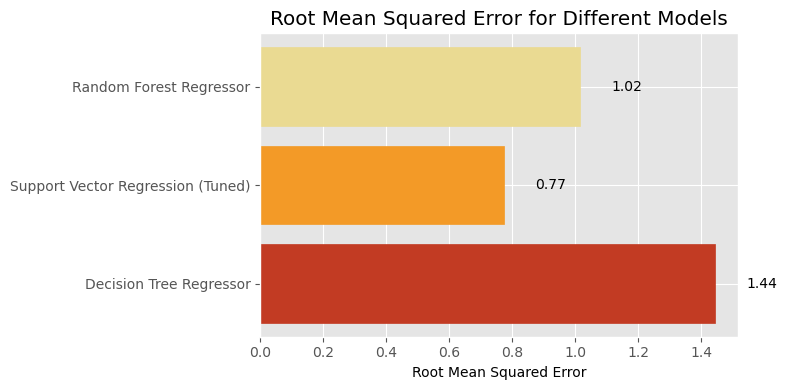

In [137]:
# RMSE
evaluation_bar(rmse_values, 'Root Mean Squared Error')

### 5.1.4 Mean Absolute Error (MAE)

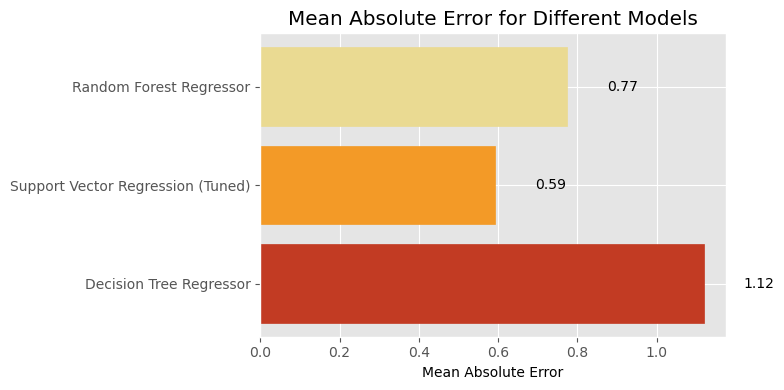

In [138]:
# MAE
evaluation_bar(mae_values, 'Mean Absolute Error')

## 5.2 Best Model Determination

-- No code available for this section --

# 6.0 Deployment

In [139]:
# Deployment: Coefficient Ranking (use SVR as the model)
deployment_columns = bar_columns.drop('Adj Close',axis = 1)
deployment_correlation = deployment_columns.corrwith(df['Adj Close']).sort_values(ascending=False)
deployment_correlation

Close         1.000000
High          0.999535
Low           0.999532
Open          0.998976
GDX_Low       0.975561
                ...   
SP_high      -0.684904
USDI_High    -0.720023
USDI_Open    -0.720140
USDI_Price   -0.721569
USDI_Low     -0.722078
Length: 79, dtype: float64

In [140]:
def create_deploy_df():
    deploy_df = df_final_cleaned.drop('Adj Close',axis = 1)
    deploy_df = deploy_df.iloc[0:0]

    deploy_df.loc[0] = [np.nan ,np.nan, np.nan, np.nan,
                    27.438380,27.970801,26.830997,27.371976,26.983699,
                    76.867335,76.887478,77.743596,75.959786,43080.207122,
                    43104.956677,43463.772107,42712.659347,1177.918042,
                    1178.505490,1188.255371,1167.594095,89.994302,
                    89.989715,90.282973,89.694715,26.221163,
                    26.540059,25.864374,26.188623,25.435367,
                    205.984261,206.871881,204.974736,205.982291,
                    193.786042,18274.272918,18357.432629,18186.397581,
                    18276.714259,18276.714259,0.496736,0.484273,
                    0.515134,1212.357567,126.882036,-0.183768,-0.179859,
                    48.583151,1.062131,32.397774,130.235962,123.528110]
    return deploy_df

In [141]:
def get_input():
     # Accept input from the user (assuming they enter numeric values)
    input_data = []
    for i in range(4):
        user_input = float(input(f"Please enter the value according to this sequence (open, high, low, close). Enter value {i + 1}: "))
        input_data.append(user_input)

    # Convert the input to a NumPy array
    input_data = np.array(input_data).reshape(1, -1)
    
    return input_data

In [142]:
def generate_prediction():
    
    deploy_df = create_deploy_df()
    
    deploy_df.loc[0, ['Open', 'High', 'Low', 'Close']] = get_input().flatten() 
    
    scaled_deploy = pd.DataFrame(scaler.transform(deploy_df), columns=deploy_df.columns, index=deploy_df.index)
    
    result = grid_search_svr.predict(scaled_deploy)
    
    print(f'\nThe prediction for \'Adj close\' tomorrow is {result[0]:.2f} USD !!')

In [143]:
generate_prediction()

Please enter the value according to this sequence (open, high, low, close). Enter value 1: 123
Please enter the value according to this sequence (open, high, low, close). Enter value 2: 124
Please enter the value according to this sequence (open, high, low, close). Enter value 3: 122
Please enter the value according to this sequence (open, high, low, close). Enter value 4: 121

The prediction for 'Adj close' tomorrow is 122.43 USD !!
